In [73]:
#지수표현식 없애기 
# pd.options.display.float_format = '{:.0f}'.format

#되돌리기
pd.reset_option('display.float_format')

# 라이브러리 import 

In [57]:
import os
import datetime
from dateutil.parser import parse
import pprint

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [2]:
# 한글 폰트 사용토록 글꼴 설정 변경
rc('font', family='AppleGothic')
# 축 레이블에서 '-' 기호 깨지지 않기 위한 설정
plt.rcParams['axes.unicode_minus'] = False

# 전처리된 데이터 파일 읽어오기

In [7]:
PREPROCESSED_DATA_SET_PATH = 'dataset/pre_processing/'
INCOME_FILENAME = '소득소비.csv'
UNEMPLOYMENT_RATE_FILENAME = '실업률.csv'
POPULATION_FILENAME = '생활인구.csv'
REPREPRO_POPULATION_FILENAME = '생활인구_재전처리.csv'
DONG_CODE_FILENAME = '행정동코드.csv'

## 행정동코드 데이터

In [4]:
dong_code_df = pd.read_csv(os.path.join(PREPROCESSED_DATA_SET_PATH, DONG_CODE_FILENAME))
dong_code_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   통계청행정동코드  424 non-null    int64 
 1   행자부행정동코드  424 non-null    int64 
 2   시도명       424 non-null    object
 3   시군구명      424 non-null    object
 4   행정동명      424 non-null    object
dtypes: int64(2), object(3)
memory usage: 16.7+ KB


## 소득소비 데이터

- **행정동 코드**는 **행정안전부**에서 고시한 "주민등록 행정기관코드" -> **행자부행정동코드**

In [8]:
income_df = pd.read_csv(os.path.join(PREPROCESSED_DATA_SET_PATH, INCOME_FILENAME))
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   기준년도          26775 non-null  int64 
 1   기준월           26775 non-null  int64 
 2   행정동_코드        26775 non-null  int64 
 3   행정동_코드_명      26775 non-null  object
 4   소득_총금액        26775 non-null  int64 
 5   소득_구간_코드      26775 non-null  int64 
 6   지출_총금액        26775 non-null  int64 
 7   식료품_지출_총금액    26775 non-null  int64 
 8   의류_신발_지출_총금액  26775 non-null  int64 
 9   생활용품_지출_총금액   26775 non-null  int64 
 10  의료비_지출_총금액    26775 non-null  int64 
 11  교통_지출_총금액     26775 non-null  int64 
 12  교육_지출_총금액     26775 non-null  int64 
 13  유흥_지출_총금액     26775 non-null  int64 
 14  여가_문화_지출_총금액  26775 non-null  int64 
 15  기타_지출_총금액     26775 non-null  int64 
 16  음식_지출_총금액     26775 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 3.5+ MB


#### 소득소비의 행정동코드 및 행정동명 갯수 확인

- 데이터 전처리로 425 -> 424

In [9]:
income_df['행정동_코드'].nunique()

424

## 실업률 데이터

In [14]:
unemployment_rate_df = pd.read_csv(os.path.join(PREPROCESSED_DATA_SET_PATH, UNEMPLOYMENT_RATE_FILENAME))
unemployment_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   기준년도           75 non-null     int64
 1   기준월            75 non-null     int64
 2   15세이상인구_합계     75 non-null     int64
 3   15세이상인구_남자     75 non-null     int64
 4   15세이상인구_여자     75 non-null     int64
 5   경제활동인구_합계      75 non-null     int64
 6   경제활동인구_남자      75 non-null     int64
 7   경제활동인구_여자      75 non-null     int64
 8   경제활동인구_취업자_합계  75 non-null     int64
 9   경제활동인구_취업자_남자  75 non-null     int64
 10  경제활동인구_취업자_여자  75 non-null     int64
 11  경제활동인구_실업자_합계  75 non-null     int64
 12  경제활동인구_실업자_남자  75 non-null     int64
 13  경제활동인구_실업자_여자  75 non-null     int64
 14  비경제활동인구_합계     75 non-null     int64
 15  비경제활동인구_남자     75 non-null     int64
 16  비경제활동인구_여자     75 non-null     int64
dtypes: int64(17)
memory usage: 10.1 KB


## 인구 데이터

In [7]:
population_df = pd.read_csv(os.path.join(PREPROCESSED_DATA_SET_PATH, POPULATION_FILENAME))

### 생활인구 데이터 월별로 데이터 재전리

In [9]:
# 시간대구분 데이터 사용
# date_series = (population_df['기준일ID'].astype('str') + population_df['시간대구분'].astype('str')).apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d%H'))
# copied_population_df = population_df.copy()
# copied_population_df.insert(loc=0, column='기준일', value=date_series)
# copied_population_df.drop(columns=['기준일ID', '시간대구분'], inplace=True)
# copied_population_df.head()

In [12]:
date_series = population_df['기준일ID'].astype('str').apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))
copied_population_df = population_df.copy()
copied_population_df.insert(loc=0, column='기준일', value=date_series)
copied_population_df.drop(columns=['기준일ID', '시간대구분'], inplace=True)
copied_population_df.head()

,기준일,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,2018-01-01,11110515,14471,528,336,381,552,568,487,565,...,389,474,636,730,611,575,495,464,450,1351
1,2018-01-01,11110530,23060,716,318,462,1075,960,923,1136,...,1055,976,1026,957,903,779,775,667,453,2046
2,2018-01-01,11110540,4929,83,64,86,256,254,188,170,...,173,143,191,198,189,168,224,191,129,491
3,2018-01-01,11110550,14061,269,208,332,483,421,332,443,...,384,413,546,512,701,679,571,630,462,1544
4,2018-01-01,11110560,20322,516,373,553,595,559,473,535,...,513,568,712,707,893,970,983,872,658,2322


In [37]:
agg_population_df = pd.DataFrame(columns=copied_population_df.columns)

for year in range(2018, 2025):
  data = copied_population_df.loc[copied_population_df['기준일'] <= datetime.datetime(year=year, month=12, day=31)]
  for month in range(1, 13):
    if month == 12:
      end_dt = datetime.date(year+1, 1, 1) - pd.DateOffset(days=1)
    else:
      end_dt = datetime.date(year, month+1, 1) - pd.DateOffset(days=1)
      
    dt_range = pd.date_range(datetime.date(year, month, 1), end_dt)
    df = data.loc[data['기준일'].isin(dt_range)]
    df = pd.pivot_table(data=df, index='행정동코드', values=['총생활인구수', '남자0세부터9세생활인구수',
          '남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '남자20세부터24세생활인구수',
          '남자25세부터29세생활인구수', '남자30세부터34세생활인구수', '남자35세부터39세생활인구수',
          '남자40세부터44세생활인구수', '남자45세부터49세생활인구수', '남자50세부터54세생활인구수',
          '남자55세부터59세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수',
          '여자0세부터9세생활인구수', '여자10세부터14세생활인구수', '여자15세부터19세생활인구수',
          '여자20세부터24세생활인구수', '여자25세부터29세생활인구수', '여자30세부터34세생활인구수',
          '여자35세부터39세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수',
          '여자50세부터54세생활인구수', '여자55세부터59세생활인구수', '여자60세부터64세생활인구수',
          '여자65세부터69세생활인구수', '여자70세이상생활인구수'], aggfunc='mean')
    df.reset_index(inplace=True)
    df.insert(loc=0, column='기준일', value=end_dt)
    agg_population_df= pd.concat([agg_population_df, df])

agg_population_df

,기준일,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,2018-01-31,11110515,16578,532,339,418,598,737,711,766,...,575,629,765,806,734,616,565,475,427,1273
1,2018-01-31,11110530,37731,561,249,405,1125,1504,1999,2332,...,2265,2148,2033,1659,1526,1177,1229,1000,734,2319
2,2018-01-31,11110540,6978,88,68,200,259,317,366,409,...,331,302,304,280,248,236,275,206,134,491
3,2018-01-31,11110550,13696,309,239,372,549,435,358,406,...,406,399,508,498,696,579,552,570,422,1438
4,2018-01-31,11110560,19980,556,402,532,600,479,479,536,...,463,530,699,704,870,913,938,941,679,2165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2024-03-31,11740650,24237,958,332,417,575,929,983,1163,...,1186,1060,1092,847,954,910,1033,940,710,1842
420,2024-03-31,11740660,27475,812,488,827,843,928,1006,1112,...,1068,1006,1169,1114,1246,1020,1228,1090,786,2043
421,2024-03-31,11740685,55688,1813,877,955,1376,1889,1965,2331,...,2216,2030,2412,2134,2425,2317,2579,2276,1819,4585
422,2024-03-31,11740690,4945,236,179,458,109,115,124,162,...,102,102,152,186,217,169,187,153,113,349


In [38]:
agg_population_df.to_csv(os.path.join(PREPROCESSED_DATA_SET_PATH, REPREPRO_POPULATION_FILENAME), index=False)

### 월별 재전처리한 생활인구 데이터 읽어오기

In [8]:
agg_population_df = pd.read_csv(os.path.join(PREPROCESSED_DATA_SET_PATH, REPREPRO_POPULATION_FILENAME))

In [9]:
merged_population_df = pd.merge(left=agg_population_df, right=dong_code_df[dong_code_df.columns[1:]], left_on='행정동코드', right_on='행자부행정동코드').drop(columns=['행자부행정동코드'])
merged_population_df = merged_population_df.loc[:, ['기준일', '시도명', '시군구명', '행정동명', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수',
       '여자70세이상생활인구수']]
merged_population_df = merged_population_df.sort_values(by='기준일').reset_index(drop=True)
merged_population_df.head()

,기준일,시도명,시군구명,행정동명,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,2018-01-31,서울,종로구,청운효자동,11110515,16577.821964,532.415629,339.256528,417.928683,597.862401,...,574.621123,629.007715,764.704657,805.902035,733.759451,616.297773,565.170154,474.760097,427.115151,1273.328839
1,2018-01-31,서울,용산구,후암동,11170510,14216.771116,384.419233,212.457909,346.971277,451.276393,...,600.647477,600.991725,632.895352,608.224432,566.412078,485.385775,564.187832,506.993383,362.306434,1222.978807
2,2018-01-31,서울,영등포구,신길7동,11560690,16221.869081,616.491876,305.358768,494.216208,527.175128,...,566.366740,563.833321,637.433658,602.530855,710.540760,620.351217,627.286847,624.889544,443.993554,1112.895680
3,2018-01-31,서울,강동구,성내3동,11740660,29796.235653,1027.178714,617.435895,991.464892,960.206583,...,1080.238875,1128.170471,1331.761559,1090.433768,1282.934434,1187.735210,1457.932699,1193.527294,919.045247,1948.548052
4,2018-01-31,서울,영등포구,신길6동,11560680,20485.013232,761.172507,366.321694,474.649077,589.284384,...,748.377758,801.539294,815.455021,799.163581,781.033489,822.130332,930.138340,811.371387,685.238509,1428.652787


# 소득소비 데이터 EDA

In [9]:
merged_income_df = pd.merge(left=income_df, right=dong_code_df[['행자부행정동코드', '시도명', '시군구명']], left_on='행정동_코드', right_on='행자부행정동코드').drop(columns=['행자부행정동코드'])
merged_income_df = merged_income_df.loc[:, ['기준년도', '기준월', '시도명', '시군구명', '행정동_코드_명', '행정동_코드', '소득_총금액', '소득_구간_코드', '지출_총금액',
       '식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액',
       '교육_지출_총금액', '유흥_지출_총금액', '여가_문화_지출_총금액', '기타_지출_총금액', '음식_지출_총금액']]
merged_income_df.head(1)

,기준년도,기준월,시도명,시군구명,행정동_코드_명,행정동_코드,소득_총금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
0,2018,10,서울,송파구,방이2동,11710562,3030242,7,4496137667,536059000,94252667,150828000,1136565333,188900000,286900333,345241000,307820333,112889000,1336682000


### Q1-1. 월평균 총소득금액이 높은 행정동 top10? 

In [90]:
df = pd.pivot_table(data=merged_income_df, index=['시도명', '시군구명', '행정동_코드_명', '행정동_코드'], values='소득_총금액').sort_values(by='소득_총금액', ascending=False)[0:10]
df

소득_총금액
시도명 시군구명 행정동_코드_명 행정동_코드          
서울  강남구  대치1동     11680600 7473250
    서초구  반포2동     11650570 6793766
    강남구  도곡2동     11680656 6601224
    서초구  서초4동     11650531 6527442
    송파구  잠실2동     11710670 6386549
         오륜동      11710566 6167211
    서초구  반포3동     11650580 6162242
    송파구  잠실7동     11710720 6061195
    양천구  목5동      11470550 6051019
    강남구  대치2동     11680610 6034764

#### A1-1. 대치1동, 반포2동, 도곡2동, 서초4동, 잠실2동, 오륜동, 반포3동, 잠실7동, 목5동, 대치2동	

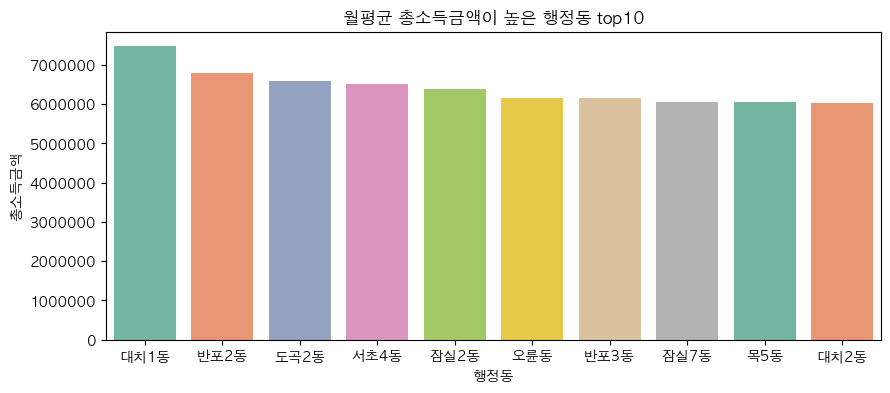

In [91]:
plt.figure(figsize=(10, 4))
plt.title(label='월평균 총소득금액이 높은 행정동 top10', loc='center')
plt.xlabel('행정동')
plt.ylabel('총소득금액')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
sns.barplot(data=df, x='행정동_코드_명', y='소득_총금액', hue='행정동_코드_명', palette='Set2')
plt.show()

### Q1-2. 월평균 총소득금액이 높은 행정동 top3의 지출항목 시각화?

#### A1-2. 월평균 총소득금액이 높은 행정동 top3의 지출항목 시각화 - 평균

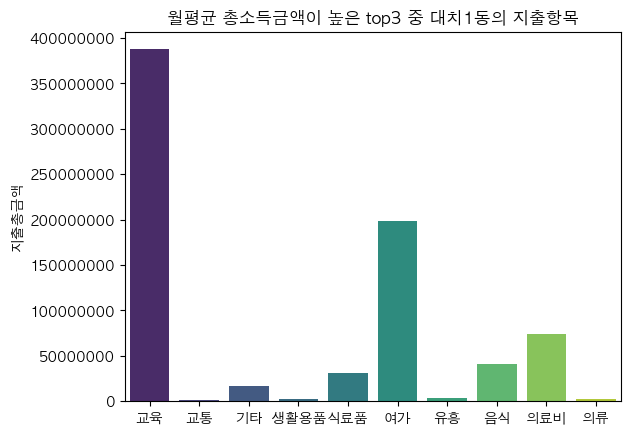

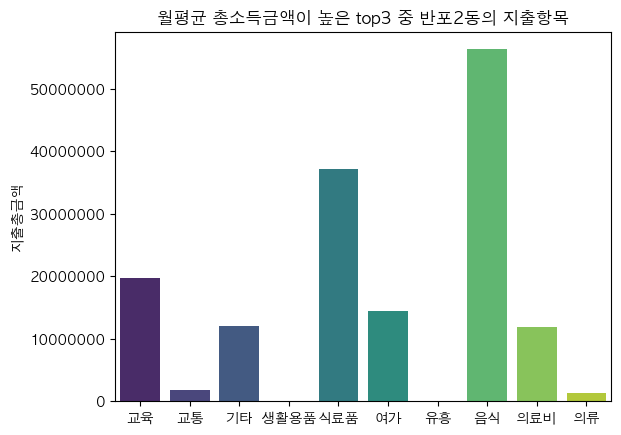

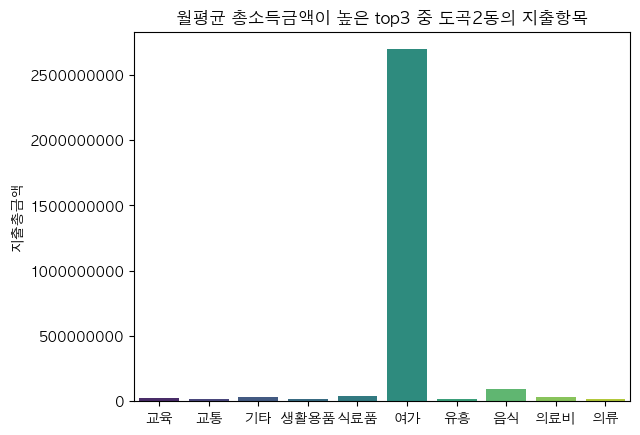

In [96]:
for dong_name in ['대치1동', '반포2동', '도곡2동']:
  temp_df = merged_income_df.loc[merged_income_df['행정동_코드_명'].str.contains(dong_name)].pivot_table(index='행정동_코드_명', values=['식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액',
       '의료비_지출_총금액', '교통_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액', '여가_문화_지출_총금액',
       '기타_지출_총금액', '음식_지출_총금액'], aggfunc='std')

  temp_df.columns = ['교육', '교통', '기타', '생활용품', '식료품', '여가', '유흥', '음식', '의료비', '의류']
  plt.title(label=f'월평균 총소득금액이 높은 top3 중 {dong_name}의 지출항목', loc='center')
  plt.ylabel('지출총금액')
  plt.ticklabel_format(axis='y',useOffset=False, style='plain')
  sns.barplot(temp_df, palette='viridis')
  plt.show()

#### A1-2. 월평균 총소득금액이 높은 행정동 top3의 지출항목 시각화 - 백분율

/var/folders/88/5nvn4tln5150l93ty6c7l6bm0000gn/T/ipykernel_1110/1409288453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.loc[:, '식료품_지출_총금액':] = test_df


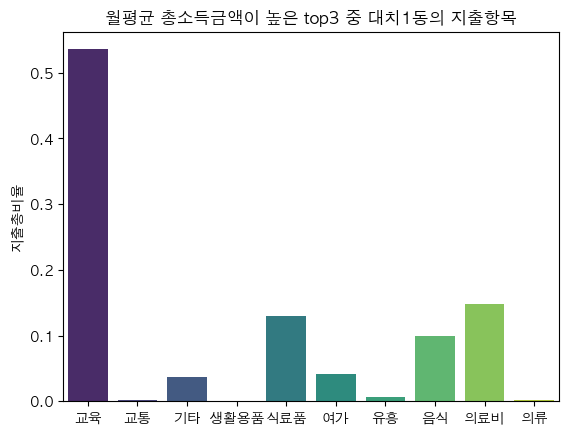

/var/folders/88/5nvn4tln5150l93ty6c7l6bm0000gn/T/ipykernel_1110/1409288453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.loc[:, '식료품_지출_총금액':] = test_df


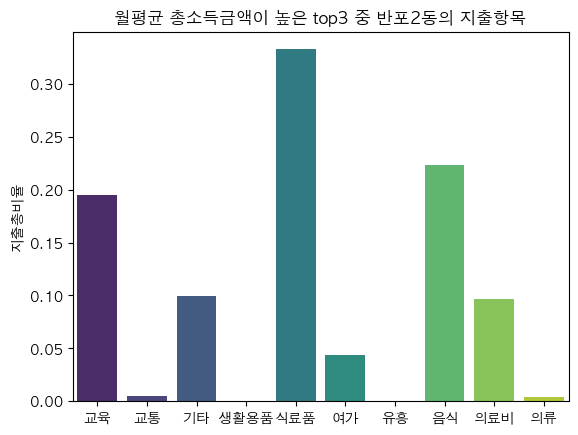

/var/folders/88/5nvn4tln5150l93ty6c7l6bm0000gn/T/ipykernel_1110/1409288453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.loc[:, '식료품_지출_총금액':] = test_df


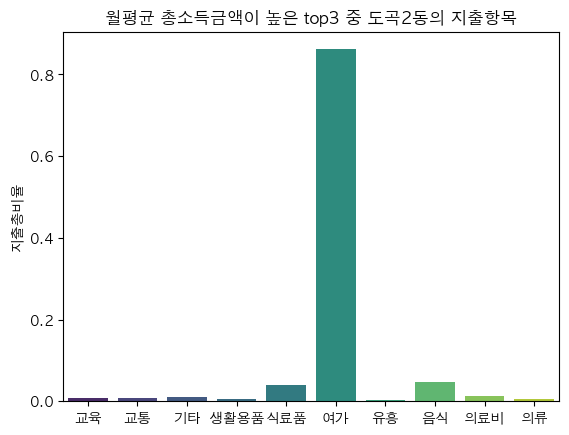

In [95]:
for dong_name in ['대치1동', '반포2동', '도곡2동']:
  temp_df = merged_income_df.loc[merged_income_df['행정동_코드_명'].str.contains(dong_name)]
  test_df = temp_df.loc[:, '식료품_지출_총금액':]
  for column in test_df.columns:
    test_df[column] /= temp_df['지출_총금액']
  temp_df.loc[:, '식료품_지출_총금액':] = test_df
  temp_df = temp_df.pivot_table(index='행정동_코드_명', values=['식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액',
        '의료비_지출_총금액', '교통_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액', '여가_문화_지출_총금액',
        '기타_지출_총금액', '음식_지출_총금액'])

  temp_df.columns = ['교육', '교통', '기타', '생활용품', '식료품', '여가', '유흥', '음식', '의료비', '의류']
  plt.title(label=f'월평균 총소득금액이 높은 top3 중 {dong_name}의 지출항목', loc='center')
  plt.ylabel('지출총비율')
  plt.ticklabel_format(axis='y',useOffset=False, style='plain')
  sns.barplot(temp_df, palette='viridis')
  plt.show()

### Q2. 월평균 총소득금액이 가장 높은 자치구 top3?

In [106]:
df = pd.pivot_table(data=merged_income_df, index=['시도명', '시군구명'], values='소득_총금액').sort_values(by='소득_총금액', ascending=False)[0:3]
df

소득_총금액
시도명 시군구명        
서울  서초구  4985200
    강남구  4868520
    송파구  3978744

#### A2. 서초구, 서초구, 서초구

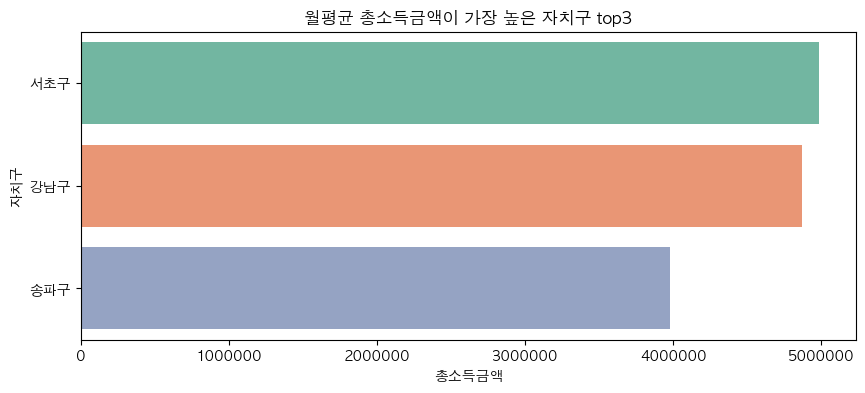

In [109]:

plt.figure(figsize=(10, 4))
plt.title(label='월평균 총소득금액이 가장 높은 자치구 top3', loc='center')
plt.xlabel('총소득금액')
plt.ylabel('자치구')
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
sns.barplot(data=df, x='소득_총금액', y='시군구명', hue='시군구명', palette='Set2')
plt.show()

### Q3-1. 월평균 총소득금액이 가장 낮은 행정동 10곳은?

In [101]:
df = pd.pivot_table(data=merged_income_df, index=['시도명', '시군구명', '행정동_코드_명', '행정동_코드'], values='소득_총금액').sort_values(by='소득_총금액')[0:10]
df

소득_총금액
시도명 시군구명 행정동_코드_명 행정동_코드          
서울  도봉구  방학2동     11320700 2114356
    종로구  창신2동     11110680 2125516
    양천구  신월3동     11470580 2168178
    강북구  수유3동     11305630 2225134
         수유1동     11305610 2231494
    중랑구  망우3동     11260660 2243167
    양천구  신월1동     11470560 2246100
    성북구  장위1동     11290760 2248820
    중랑구  면목5동     11260550 2249738
    도봉구  창3동      11320513 2250316

#### A3-1. 방학2동, 창신2동, 신월3동,	수유3동, 수유1동,	망우3동, 신월1동, 장위1동, 면목5동, 창3동	

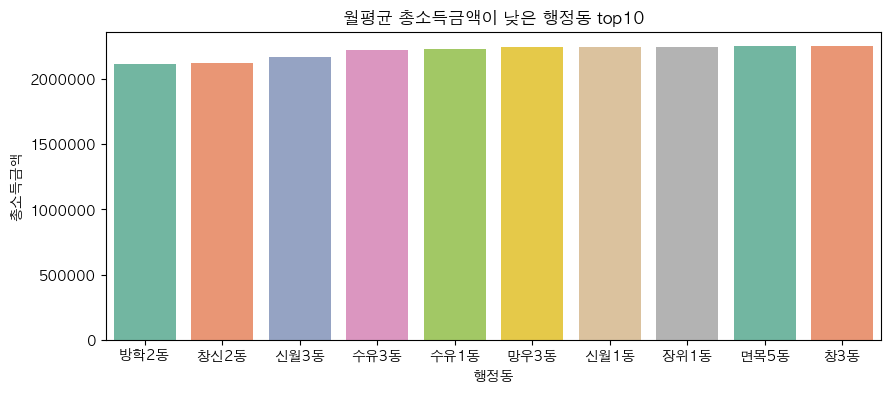

In [100]:
plt.figure(figsize=(10, 4))
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.title(label='월평균 총소득금액이 낮은 행정동 top10', loc='center')
plt.xlabel('행정동')
plt.ylabel('총소득금액')
sns.barplot(data=df, x='행정동_코드_명', y='소득_총금액', hue='행정동_코드_명', palette='Set2')
plt.show()

### Q3-2. 월평균 총소득금액이 낮은 행정동 top3의 지출항목 시각화?

#### A3-2. 월평균 총소득금액이 낮은 행정동 top3의 지출항목 시각화 - 평균

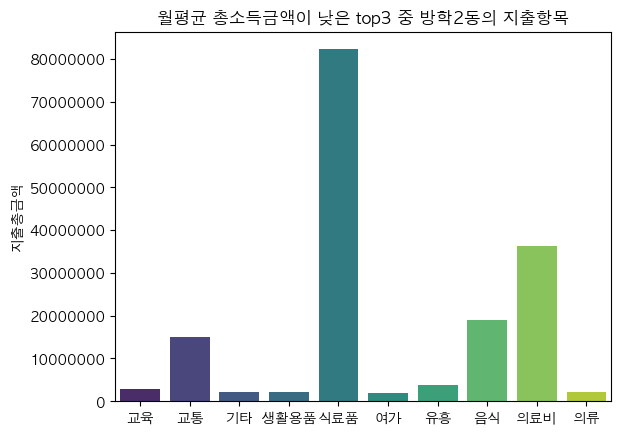

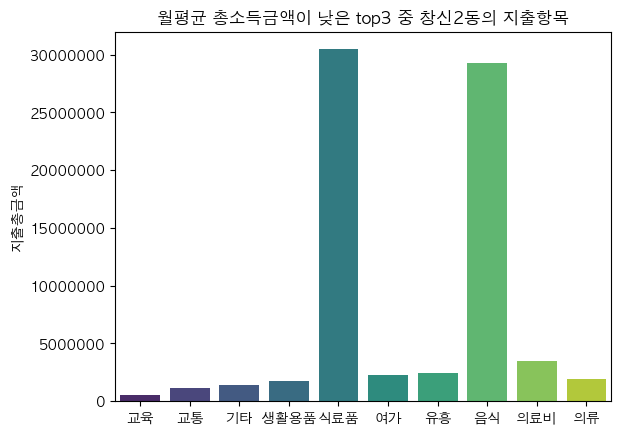

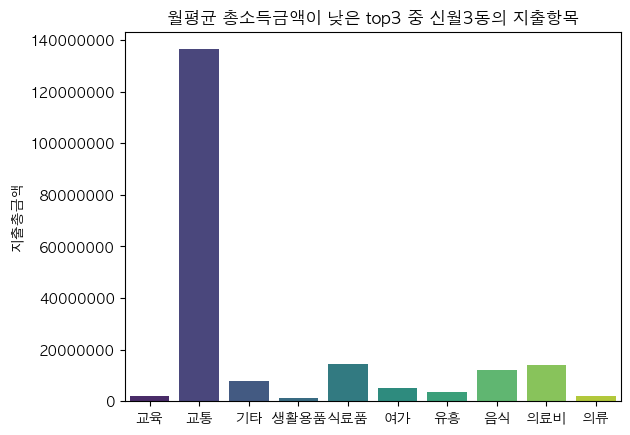

In [103]:
for dong_name in ['방학2동', '창신2동', '신월3동']:
  temp_df = merged_income_df.loc[merged_income_df['행정동_코드_명'].str.contains(dong_name)].pivot_table(index='행정동_코드_명', values=['식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액',
       '의료비_지출_총금액', '교통_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액', '여가_문화_지출_총금액',
       '기타_지출_총금액', '음식_지출_총금액'], aggfunc='std')

  temp_df.columns = ['교육', '교통', '기타', '생활용품', '식료품', '여가', '유흥', '음식', '의료비', '의류']
  plt.title(label=f'월평균 총소득금액이 낮은 top3 중 {dong_name}의 지출항목', loc='center')
  plt.ylabel('지출총금액')
  plt.ticklabel_format(axis='y',useOffset=False, style='plain')
  sns.barplot(temp_df, palette='viridis')
  plt.show()

#### A3-2. 월평균 총소득금액이 낮은 행정동 top3의 지출항목 시각화 - 백분율

/var/folders/88/5nvn4tln5150l93ty6c7l6bm0000gn/T/ipykernel_1110/3863926291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.loc[:, '식료품_지출_총금액':] = test_df


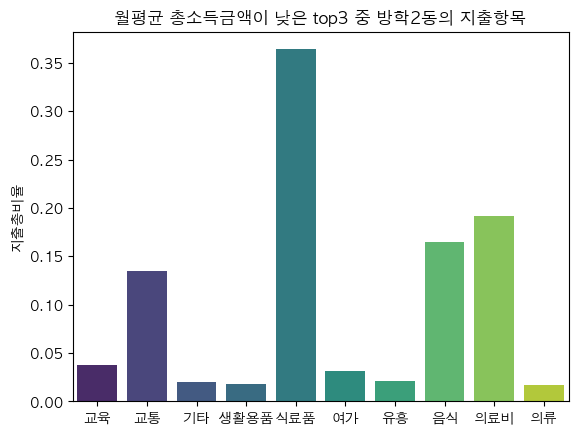

/var/folders/88/5nvn4tln5150l93ty6c7l6bm0000gn/T/ipykernel_1110/3863926291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.loc[:, '식료품_지출_총금액':] = test_df


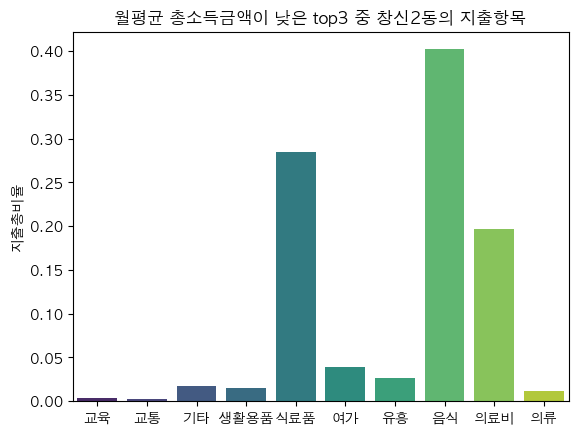

/var/folders/88/5nvn4tln5150l93ty6c7l6bm0000gn/T/ipykernel_1110/3863926291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.loc[:, '식료품_지출_총금액':] = test_df


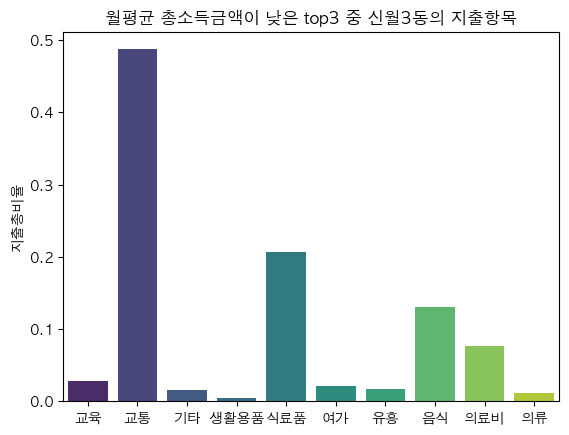

In [104]:
for dong_name in ['방학2동', '창신2동', '신월3동']:
  temp_df = merged_income_df.loc[merged_income_df['행정동_코드_명'].str.contains(dong_name)]
  test_df = temp_df.loc[:, '식료품_지출_총금액':]
  for column in test_df.columns:
    test_df[column] /= temp_df['지출_총금액']
  temp_df.loc[:, '식료품_지출_총금액':] = test_df
  temp_df = temp_df.pivot_table(index='행정동_코드_명', values=['식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액',
        '의료비_지출_총금액', '교통_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액', '여가_문화_지출_총금액',
        '기타_지출_총금액', '음식_지출_총금액'])

  temp_df.columns = ['교육', '교통', '기타', '생활용품', '식료품', '여가', '유흥', '음식', '의료비', '의류']
  plt.title(label=f'월평균 총소득금액이 낮은 top3 중 {dong_name}의 지출항목', loc='center')
  plt.ylabel('지출총비율')
  plt.ticklabel_format(axis='y',useOffset=False, style='plain')
  sns.barplot(temp_df, palette='viridis')
  plt.show()

### Q4. 월평균 총소득금액이 가장 낮은 자치구 3곳은?

In [31]:
df = pd.pivot_table(data=merged_income_df, index=['시도명', '시군구명'], values='소득_총금액').sort_values(by='소득_총금액')[0:3]
df

소득_총금액
시도명 시군구명        
서울  강북구  2518651
    중랑구  2580318
    금천구  2591225

#### A4. 강북구, 중랑구, 금천구

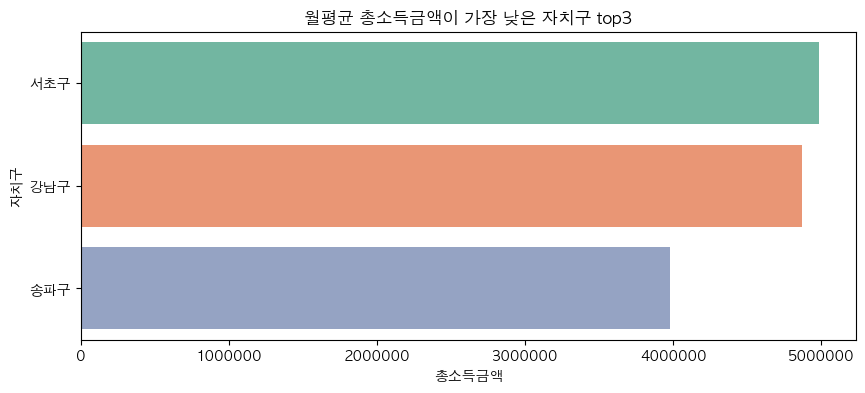

In [110]:
plt.figure(figsize=(10, 4))
plt.title(label='월평균 총소득금액이 가장 낮은 자치구 top3', loc='center')
plt.xlabel('총소득금액')
plt.ylabel('자치구')
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
sns.barplot(data=df, x='소득_총금액', y='시군구명', hue='시군구명', palette='Set2', errorbar=None)
plt.show()

### Q5. 소득 구간 코드 값이 의미하는 바는?

In [79]:
merged_income_df['소득_구간_코드'].unique()

array([ 7,  6,  8,  5,  9, 10])

In [112]:
df = pd.pivot_table(data=merged_income_df, index='소득_구간_코드', values='소득_총금액').sort_values(by='소득_총금액')
df

,소득_총금액
소득_구간_코드,
5,2329477
6,2706139
7,3300486
8,4217021
9,5575826
10,7473250


#### A5. 소득구간코드 값이 클수록 소득총금액이 많다

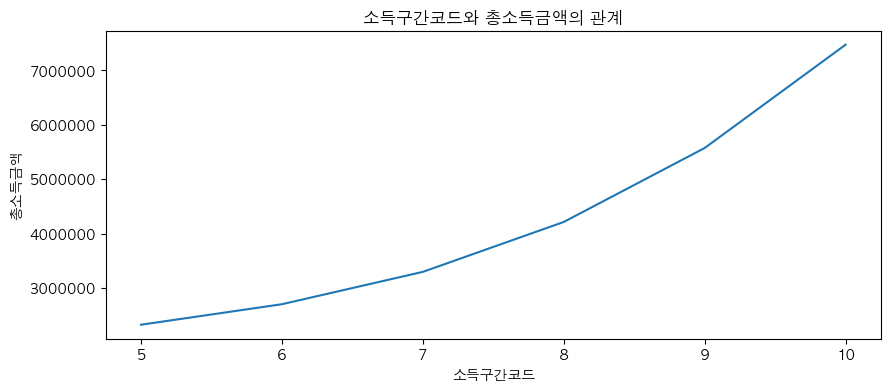

In [113]:
plt.figure(figsize=(10, 4))
plt.title(label='소득구간코드와 총소득금액의 관계', loc='center')
plt.xlabel('소득구간코드')
plt.ylabel('총소득금액')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
sns.lineplot(data=df, x='소득_구간_코드', y='소득_총금액')
plt.show()

### Q6-1. 행정동별 소득구간코드는?

In [115]:
df = pd.pivot_table(data=merged_income_df, index=['시군구명', '행정동_코드_명', '소득_구간_코드'], values='소득_총금액').sort_values(by='소득_총금액')
df

소득_총금액
시군구명 행정동_코드_명 소득_구간_코드        
도봉구  방학2동     5        2114356
종로구  창신2동     5        2125516
양천구  신월3동     5        2168178
강북구  수유3동     5        2225134
     수유1동     5        2231494
...                        ...
송파구  잠실2동     9        6386549
서초구  서초4동     9        6527442
강남구  도곡2동     9        6601224
서초구  반포2동     9        6793766
강남구  대치1동     10       7473250

[507 rows x 1 columns]

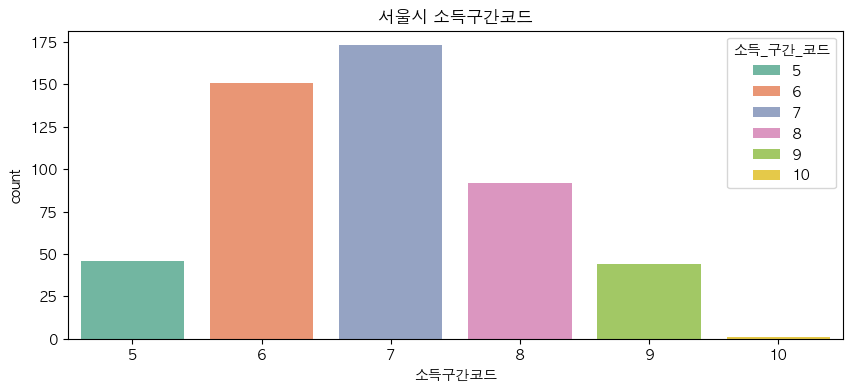

In [120]:
plt.figure(figsize=(10, 4))
plt.title(label='서울시 소득구간코드', loc='center')
plt.xlabel('소득구간코드')
sns.countplot(data=df, x='소득_구간_코드', hue='소득_구간_코드', palette='Set2')
plt.show()

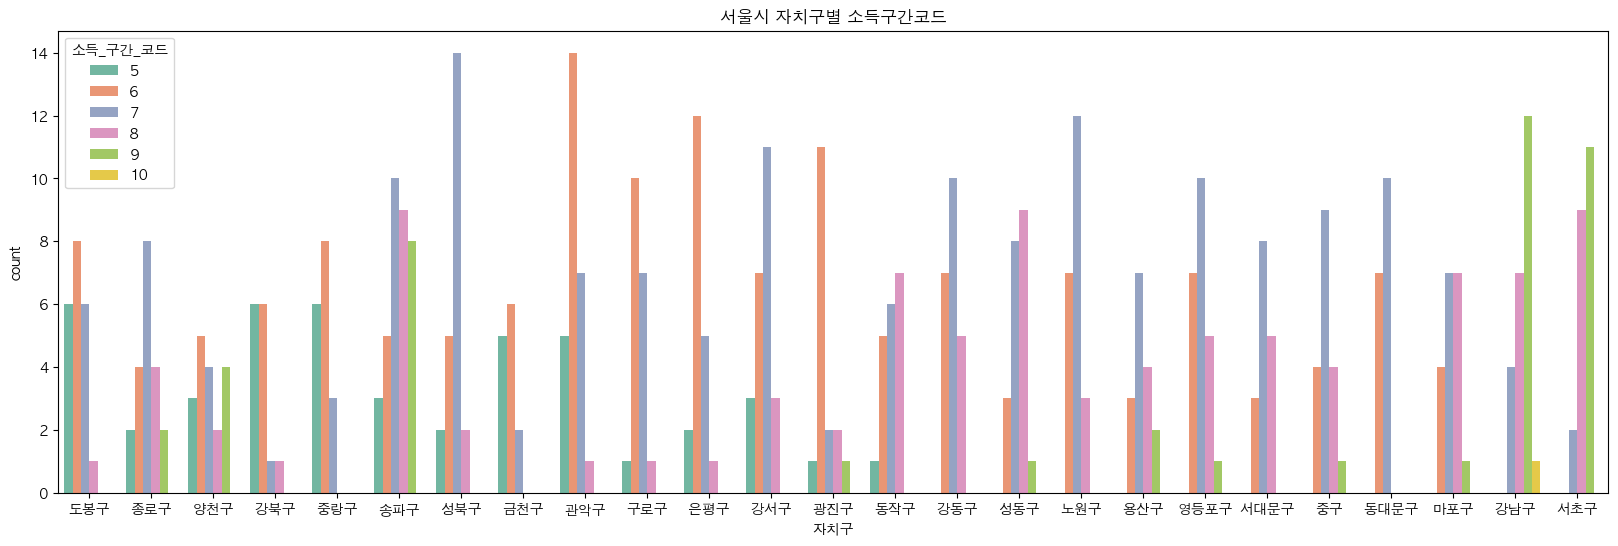

In [121]:
plt.figure(figsize=(20, 6))
plt.title(label='서울시 자치구별 소득구간코드', loc='center')
plt.xlabel('자치구')
sns.countplot(data=df, x='시군구명', hue='소득_구간_코드', palette='Set2')
plt.show()

### Q6-2. 소득구간코드 10에 해당하는 행정동은?

In [66]:
# 소득구간코드 10
income_10bin_list = merged_income_df.loc[merged_income_df['소득_구간_코드'] == 10]['행정동_코드_명'].value_counts().index
income_10bin_list

Index(['대치1동'], dtype='object')

#### A6-2. 소득구간코드 10 -> 대치1동

### Q6-3. 소득구간코드 5에 해당하는 행정동은?

In [67]:
# 소득구간코드 5
income_5bin_list = merged_income_df.loc[merged_income_df['소득_구간_코드'] == 5]['행정동_코드_명'].value_counts().index
income_5bin_list

Index(['면목5동', '인수동', '창3동', '수유3동', '신월3동', '독산2동', '난곡동', '망우3동', '번1동',
       '수유1동', '독산4동', '미아동', '중화2동', '창신2동', '도봉1동', '신월7동', '장위2동', '가리봉동',
       '신월1동', '마천2동', '면목2동', '면목본동', '장위1동', '번2동', '방학2동', '면목3?8동', '쌍문1동',
       '화곡2동', '시흥4동', '서원동', '화곡4동', '응암3동', '중곡3동', '마천1동', '쌍문2동', '창신1동',
       '신림동', '쌍문3동', '시흥5동', '신원동', '불광2동', '화곡본동', '노량진2동', '신사동', '독산3동',
       '위례동'],
      dtype='object')

#### A6-3. 소득구간코드 5 

'면목5동', '인수동', '창3동', '수유3동', '신월3동', '독산2동', '난곡동', '망우3동', '번1동', \
'수유1동', '독산4동', '미아동', '중화2동', '창신2동', '도봉1동', '신월7동', '장위2동', '가리봉동', \
'신월1동', '마천2동', '면목2동', '면목본동', '장위1동', '번2동', '방학2동', '면목3?8동', '쌍문1동', \
'화곡2동', '시흥4동', '서원동', '화곡4동', '응암3동', '중곡3동', '마천1동', '쌍문2동', '창신1동', \
'신림동', '쌍문3동', '시흥5동', '신원동', '불광2동', '화곡본동', '노량진2동', '신사동', '독산3동', \
'위례동'

# 실업률 데이터 EDA

* 15세이상인구 : '15세이상인구 중 군인, 전투경찰, 공익근무요원, 형이 확정된 
교도소 수감자' 등은 제외됨 
* 경제활동인구 : 만 15세 이상 인구 중 취업자와 실업자를 말함 
	- 취업자 : 
		1. 조사대상 주간 중 수입을 목적으로 1시간 이상 일한 자 
		2. 자기에게 직접적으로는 이득이나 수입이 오지 않더라도 자기가구에서 
		경영하는 농장이나 사업체의 수입을 높이는 데 도운 가족종사자로서 
		주당 18시간이상 일한 자(무급가족종사자) 
		3. 직장 또는 사업체를 가지고 있으나 조사대상 주간 중 일시적인 병, 
		일기불순, 휴가 또는 연가, 노동쟁의 등의 이유로 일하지 못한 일시휴직자 
	- 실업자 : 조사대상주간에 수입 있는 일을 하지 않았고, 지난 4주간 일자리를 찾아 
	적극적으로 구직활동을 하였던 사람으로서 일자리가 주어지면 즉시 취업이 
	가능한 사람 
* 비경제활동인구 : 조사대상 주간 중 취업자도 실업자도 아닌 만 15세 이상인 자. 
즉 집안에서 가사와 육아를 전담하는 가정주부, 학교에 다니는 학생, 
일을 할 수 없는 연로자와 심신 장애자, 자발적으로 자선사업이나 
종교단체에 관여하는 자 등을 말함 

In [15]:
date_series = (unemployment_rate_df['기준년도'].astype('str') + "-" + unemployment_rate_df['기준월'].astype('str') + "-28").apply(lambda x: parse(x))
unemployment_rate_df.insert(loc=0, column='시점', value=date_series)
unemployment_rate_df

,시점,기준년도,기준월,15세이상인구_합계,15세이상인구_남자,15세이상인구_여자,경제활동인구_합계,경제활동인구_남자,경제활동인구_여자,경제활동인구_취업자_합계,경제활동인구_취업자_남자,경제활동인구_취업자_여자,경제활동인구_실업자_합계,경제활동인구_실업자_남자,경제활동인구_실업자_여자,비경제활동인구_합계,비경제활동인구_남자,비경제활동인구_여자
0,2018-01-28,2018,1,8540,4085,4456,5341,2956,2385,5105,2830,2275,237,126,110,3199,1129,2070
1,2018-02-28,2018,2,8538,4083,4455,5344,2946,2398,5060,2797,2263,284,149,135,3194,1137,2057
2,2018-03-28,2018,3,8534,4079,4455,5381,2976,2404,5083,2799,2284,298,178,121,3153,1103,2050
3,2018-04-28,2018,4,8533,4078,4454,5363,2952,2412,5098,2806,2291,266,145,120,3169,1127,2043
4,2018-05-28,2018,5,8530,4076,4454,5381,2966,2415,5097,2801,2296,285,165,120,3149,1110,2039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2023-11-28,2023,11,8475,4020,4456,5376,2883,2493,5230,2809,2421,146,74,72,3099,1136,1963
71,2023-12-28,2023,12,8477,4021,4456,5345,2850,2494,5192,2758,2434,153,92,60,3132,1171,1962
72,2024-01-28,2024,1,8478,4022,4456,5364,2867,2497,5195,2777,2418,169,90,79,3114,1155,1959
73,2024-02-28,2024,2,8476,4020,4456,5376,2862,2514,5219,2778,2441,157,84,73,3100,1158,1942


### Q1. 시간에 따른 전체 합계 추이는?

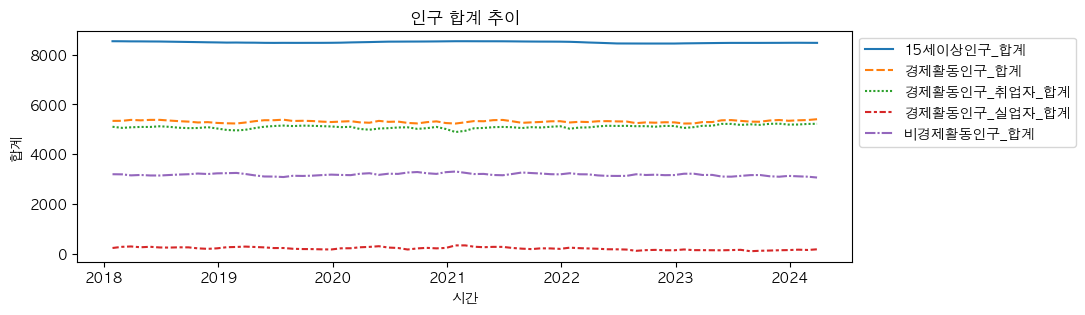

In [98]:
df = unemployment_rate_df[['시점', '15세이상인구_합계', '경제활동인구_합계', '경제활동인구_취업자_합계', '경제활동인구_실업자_합계', '비경제활동인구_합계']]
plt.figure(figsize=(10, 3))
plt.title('인구 합계 추이')
plt.xlabel('시간')
plt.ylabel('합계')
sns.lineplot(data=df.set_index('시점'))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Q2. 시간에 따른 각 인구 합계 추이는?

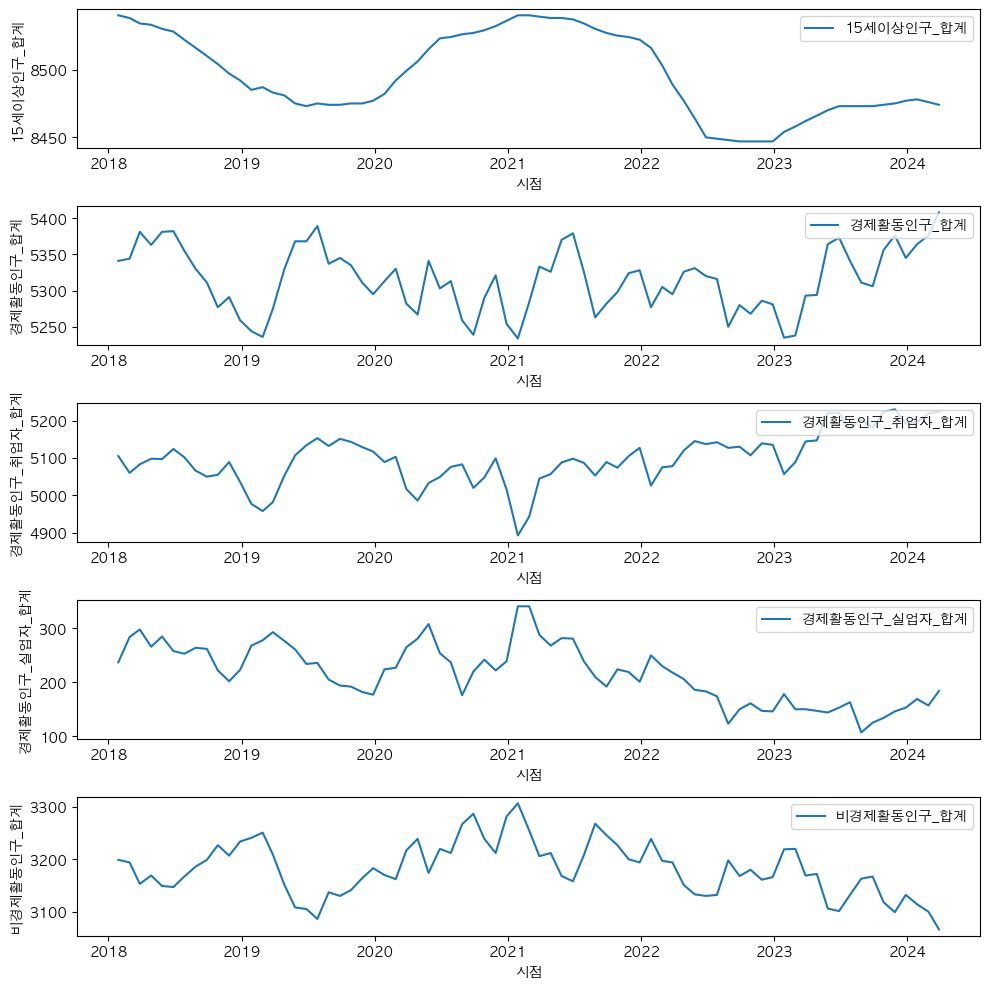

In [100]:
df = unemployment_rate_df[['시점', '15세이상인구_합계', '경제활동인구_합계', '경제활동인구_취업자_합계', '경제활동인구_실업자_합계', '비경제활동인구_합계']]
plt.figure(figsize=(10, 10))
index = 1
for col_name in df.columns[index:]:
  plt.subplot(5, 1, index)
  sns.lineplot(data=df, x='시점', y=col_name, label=col_name)
  plt.legend(loc='upper right')
  plt.tight_layout()
  index += 1
plt.show()

### Q3. 시간에 따른 남성의 합계 추이는?

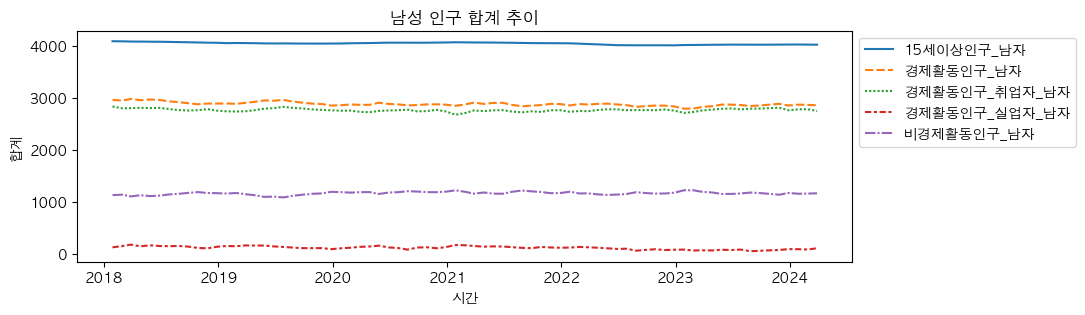

In [101]:
column_list = [col_name for col_name in unemployment_rate_df.columns if '남자' in col_name]
df = unemployment_rate_df[['시점'] + column_list]
plt.figure(figsize=(10, 3))
plt.title('남성 인구 합계 추이')
plt.xlabel('시간')
plt.ylabel('합계')
sns.lineplot(data=df.set_index('시점'))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Q4. 시간에 따른 남성의 각 합계 추이는?

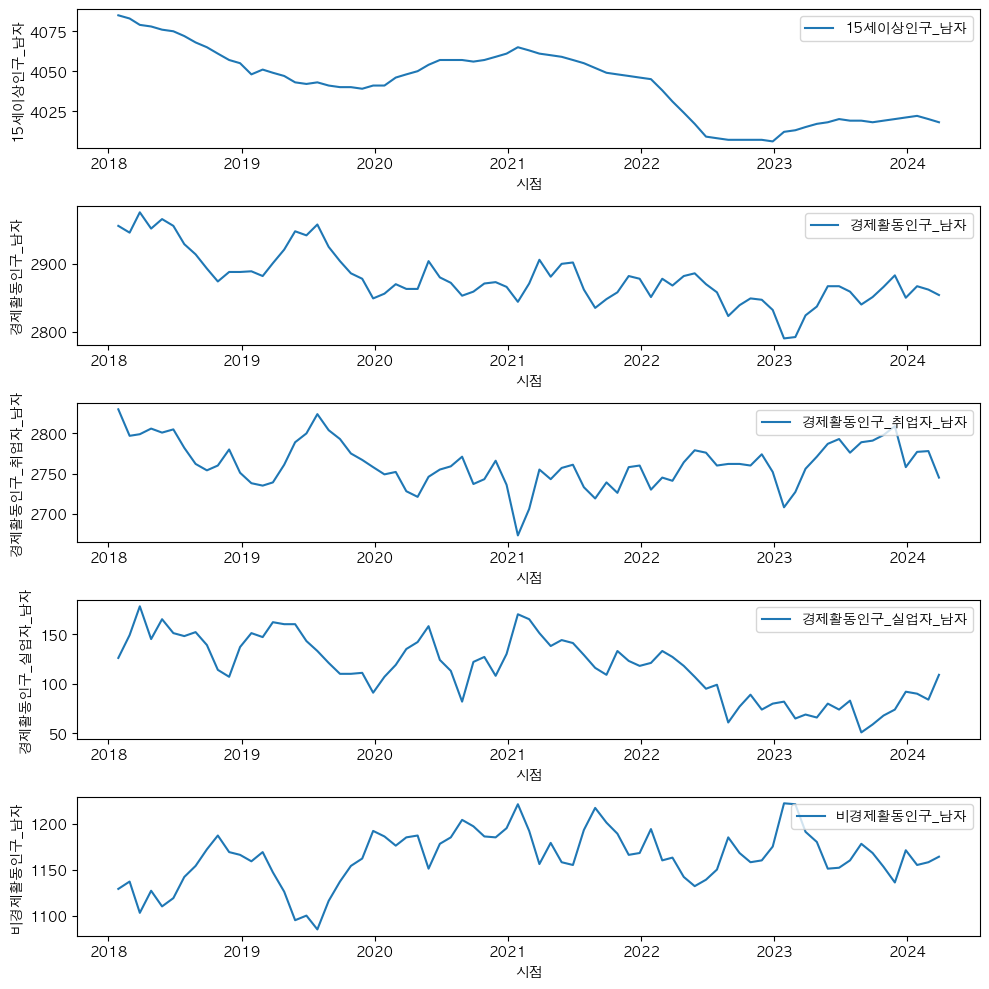

In [103]:
column_list = [col_name for col_name in unemployment_rate_df.columns if '남자' in col_name]
df = unemployment_rate_df[['시점'] + column_list]
plt.figure(figsize=(10, 10))
index = 1
for col_name in df.columns[index:]:
  plt.subplot(5, 1, index)
  sns.lineplot(data=df, x='시점', y=col_name, label=col_name)
  plt.legend(loc='upper right')
  plt.tight_layout()
  index += 1
plt.show()

### Q5. 여성의 시간에 따른 각 합계 추이는?

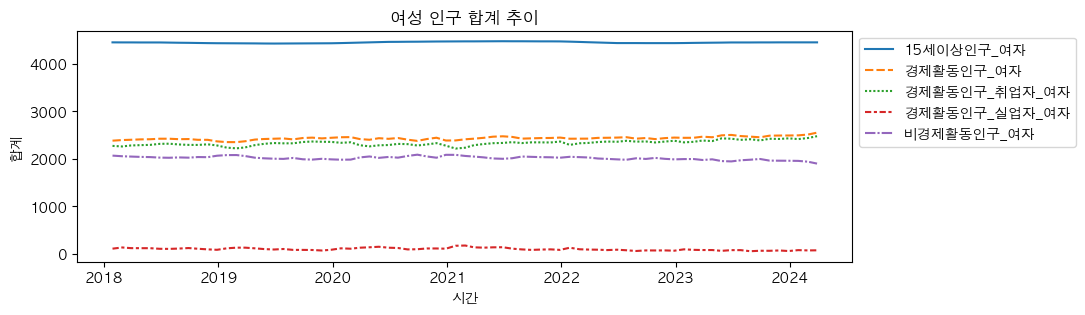

In [104]:
column_list = [col_name for col_name in unemployment_rate_df.columns if '여자' in col_name]
df = unemployment_rate_df[['시점'] + column_list]
plt.figure(figsize=(10, 3))
plt.title('여성 인구 합계 추이')
plt.xlabel('시간')
plt.ylabel('합계')
sns.lineplot(data=df.set_index('시점'))
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Q6. 시간에 따른 여성의 각 합계 추이는?

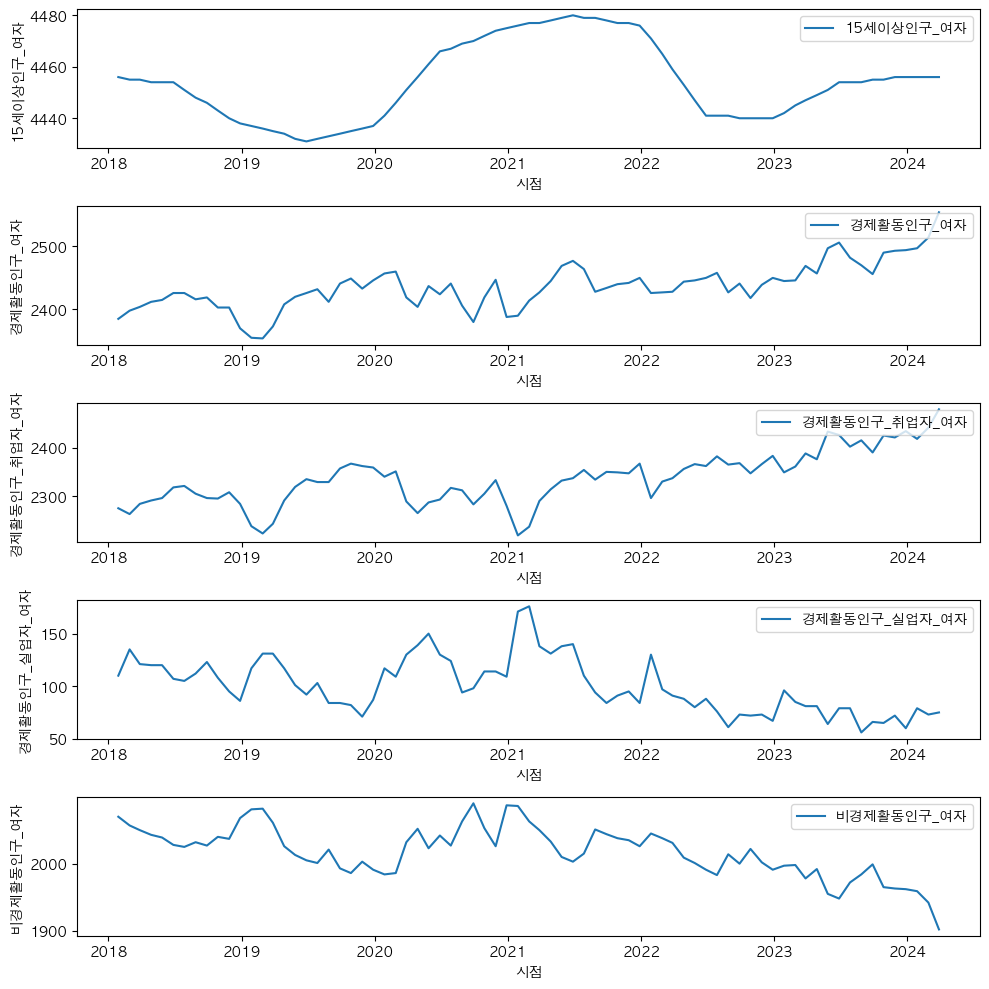

In [105]:
column_list = [col_name for col_name in unemployment_rate_df.columns if '여자' in col_name]
df = unemployment_rate_df[['시점'] + column_list]
plt.figure(figsize=(10, 10))
index = 1
for col_name in df.columns[index:]:
  plt.subplot(5, 1, index)
  sns.lineplot(data=df, x='시점', y=col_name, label=col_name)
  plt.legend(loc='upper right')
  plt.tight_layout()
  index += 1
plt.show()

### Q7. 경제활동인구가 가장 적은 기간은?

#### A7 (1). 경제활동인구_취업자_합계 가장 작은 값 구하기

In [108]:
unemployment_rate_df.loc[unemployment_rate_df['경제활동인구_취업자_합계'] == unemployment_rate_df['경제활동인구_취업자_합계'].min()]

,시점,기준년도,기준월,15세이상인구_합계,15세이상인구_남자,15세이상인구_여자,경제활동인구_합계,경제활동인구_남자,경제활동인구_여자,경제활동인구_취업자_합계,경제활동인구_취업자_남자,경제활동인구_취업자_여자,경제활동인구_실업자_합계,경제활동인구_실업자_남자,경제활동인구_실업자_여자,비경제활동인구_합계,비경제활동인구_남자,비경제활동인구_여자
36,2021-01-28,2021,1,8540,4065,4476,5234,2844,2390,4893,2673,2219,341,170,171,3307,1221,2086


#### A7 (2). 경제활동인구_실업자_합계 가장 큰 값 구하기

In [109]:
unemployment_rate_df.loc[unemployment_rate_df['경제활동인구_실업자_합계'] == unemployment_rate_df['경제활동인구_실업자_합계'].max()]

,시점,기준년도,기준월,15세이상인구_합계,15세이상인구_남자,15세이상인구_여자,경제활동인구_합계,경제활동인구_남자,경제활동인구_여자,경제활동인구_취업자_합계,경제활동인구_취업자_남자,경제활동인구_취업자_여자,경제활동인구_실업자_합계,경제활동인구_실업자_남자,경제활동인구_실업자_여자,비경제활동인구_합계,비경제활동인구_남자,비경제활동인구_여자
36,2021-01-28,2021,1,8540,4065,4476,5234,2844,2390,4893,2673,2219,341,170,171,3307,1221,2086
37,2021-02-28,2021,2,8540,4063,4477,5284,2871,2414,4943,2706,2237,341,165,176,3255,1192,2063


#### A7 (3). 경제활동인구_합계 가장 작은 값 구하기

In [110]:
unemployment_rate_df.loc[unemployment_rate_df['경제활동인구_합계'] == unemployment_rate_df['경제활동인구_합계'].min()]

,시점,기준년도,기준월,15세이상인구_합계,15세이상인구_남자,15세이상인구_여자,경제활동인구_합계,경제활동인구_남자,경제활동인구_여자,경제활동인구_취업자_합계,경제활동인구_취업자_남자,경제활동인구_취업자_여자,경제활동인구_실업자_합계,경제활동인구_실업자_남자,경제활동인구_실업자_여자,비경제활동인구_합계,비경제활동인구_남자,비경제활동인구_여자
36,2021-01-28,2021,1,8540,4065,4476,5234,2844,2390,4893,2673,2219,341,170,171,3307,1221,2086


### Q8. 경제활동인구가 가장 많은 기간은?

#### A7 (1). 경제활동인구_취업자_합계 가장 많은 값 구하기

In [140]:
unemployment_rate_df.loc[unemployment_rate_df['경제활동인구_취업자_합계'] == unemployment_rate_df['경제활동인구_취업자_합계'].max()]

,시점,기준년도,기준월,15세이상인구_합계,15세이상인구_남자,15세이상인구_여자,경제활동인구_합계,경제활동인구_남자,경제활동인구_여자,경제활동인구_취업자_합계,경제활동인구_취업자_남자,경제활동인구_취업자_여자,경제활동인구_실업자_합계,경제활동인구_실업자_남자,경제활동인구_실업자_여자,비경제활동인구_합계,비경제활동인구_남자,비경제활동인구_여자
70,2023-11-28,2023,11,8475,4020,4456,5376,2883,2493,5230,2809,2421,146,74,72,3099,1136,1963


#### A7 (2). 경제활동인구_실업자_합계 가장 적은 값 구하기

In [141]:
unemployment_rate_df.loc[unemployment_rate_df['경제활동인구_실업자_합계'] == unemployment_rate_df['경제활동인구_실업자_합계'].min()]

,시점,기준년도,기준월,15세이상인구_합계,15세이상인구_남자,15세이상인구_여자,경제활동인구_합계,경제활동인구_남자,경제활동인구_여자,경제활동인구_취업자_합계,경제활동인구_취업자_남자,경제활동인구_취업자_여자,경제활동인구_실업자_합계,경제활동인구_실업자_남자,경제활동인구_실업자_여자,비경제활동인구_합계,비경제활동인구_남자,비경제활동인구_여자
67,2023-08-28,2023,8,8473,4019,4454,5311,2840,2470,5203,2789,2415,107,51,56,3163,1178,1984


#### A7 (3). 경제활동인구_합계 가장 큰 값 구하기

In [142]:
unemployment_rate_df.loc[unemployment_rate_df['경제활동인구_합계'] == unemployment_rate_df['경제활동인구_합계'].max()]

,시점,기준년도,기준월,15세이상인구_합계,15세이상인구_남자,15세이상인구_여자,경제활동인구_합계,경제활동인구_남자,경제활동인구_여자,경제활동인구_취업자_합계,경제활동인구_취업자_남자,경제활동인구_취업자_여자,경제활동인구_실업자_합계,경제활동인구_실업자_남자,경제활동인구_실업자_여자,비경제활동인구_합계,비경제활동인구_남자,비경제활동인구_여자
74,2024-03-28,2024,3,8474,4018,4456,5408,2854,2554,5224,2745,2479,184,109,75,3066,1164,1902


# 인구데이터 EDA

- 서울시가 보유한 공공데이터와 통신데이터로 측정한 특정시점에 서울의 특정 지역에 존재하는 모든인구수 정보

## Q1. 시간에 따른 총생활인구수 추이는?

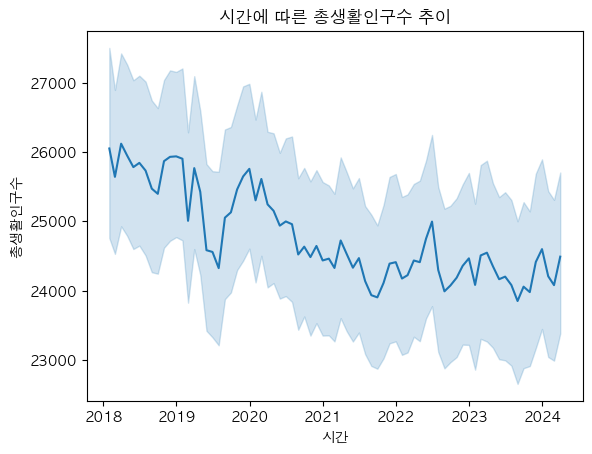

In [85]:
plt.title('시간에 따른 총생활인구수 추이')
plt.xlabel('시간')
sns.lineplot(data=merged_population_df, x='기준일', y='총생활인구수')
plt.show()

## Q2. 총생활인구수가 가장 많은 행정동 top5?

In [109]:
df = pd.pivot_table(data=merged_population_df, index=['시도명', '시군구명', '행정동명', '행정동코드'], values='총생활인구수', aggfunc='mean').sort_values(by='총생활인구수', ascending=False)[0:5]
df

총생활인구수
시도명 시군구명 행정동명        행정동코드           
서울  강남구  역삼1동        11680640  106008
    영등포구 여의동         11560540   91260
    마포구  서교동         11440660   73694
    서초구  서초3동        11650530   65058
    종로구  종로1.2.3.4가동 11110615   64089

<Axes: title={'center': '월평균 총생활인구수 가장 많은 행정동 top5'}, xlabel='행정동명', ylabel='총생활인구수'>

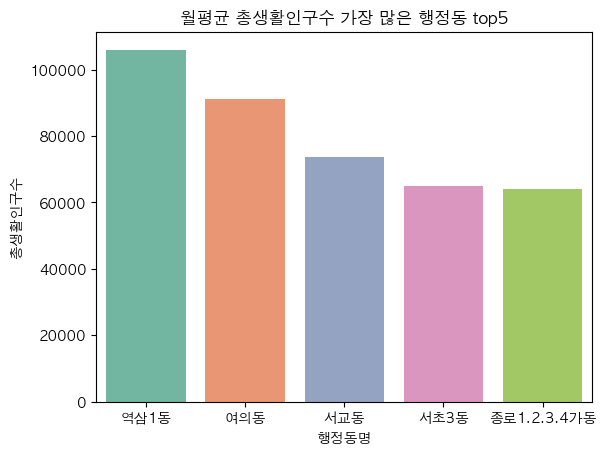

In [87]:
plt.title('월평균 총생활인구수 가장 많은 행정동 top5')
sns.barplot(data=df, x='행정동명', y='총생활인구수', hue='행정동명', palette='Set2')

## Q3. 총생활인구수가 가장 적은 행정동 top5?

In [105]:
df = pd.pivot_table(data=merged_population_df, index=['시도명', '시군구명', '행정동명', '행정동코드'], values='총생활인구수', aggfunc='mean').sort_values(by='총생활인구수')[0:5]
df

총생활인구수
시도명 시군구명 행정동명 행정동코드           
서울  종로구  창신3동 11110690    4677
    양천구  신월6동 11470610    5245
    종로구  삼청동  11110540    6075
    강동구  둔촌1동 11740690    6175
    종로구  무악동  11110570    6961

<Axes: title={'center': '월평균 총생활인구수 가장 적은 행정동 top5'}, xlabel='행정동명', ylabel='총생활인구수'>

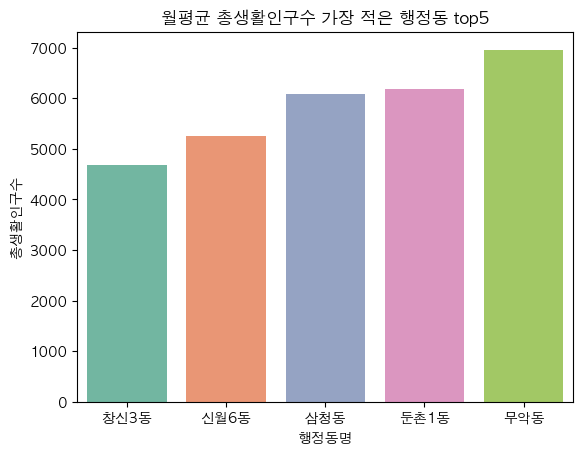

In [106]:
plt.title('월평균 총생활인구수 가장 적은 행정동 top5')
sns.barplot(data=df, x='행정동명', y='총생활인구수', hue='행정동명', palette='Set2')

## Q4. 자치구별 총생활인구수는?

In [94]:
df = pd.pivot_table(data=merged_population_df, index=['시도명', '시군구명'], values='총생활인구수', aggfunc='mean')
df

총생활인구수
시도명 시군구명        
서울  강남구    36665
    강동구    27495
    강북구    22614
    강서구    27001
    관악구    22736
    광진구    24504
    구로구    25951
    금천구    22076
    노원구    26818
    도봉구    19779
    동대문구   25330
    동작구    25946
    마포구    28415
    서대문구   25934
    서초구    31846
    성동구    20144
    성북구    21188
    송파구    27625
    양천구    21363
    영등포구   26089
    용산구    17903
    은평구    27252
    종로구    16939
    중구     17860
    중랑구    22086

<Axes: title={'center': '자치구별 월평균 총생활인구수'}, xlabel='시군구명', ylabel='총생활인구수'>

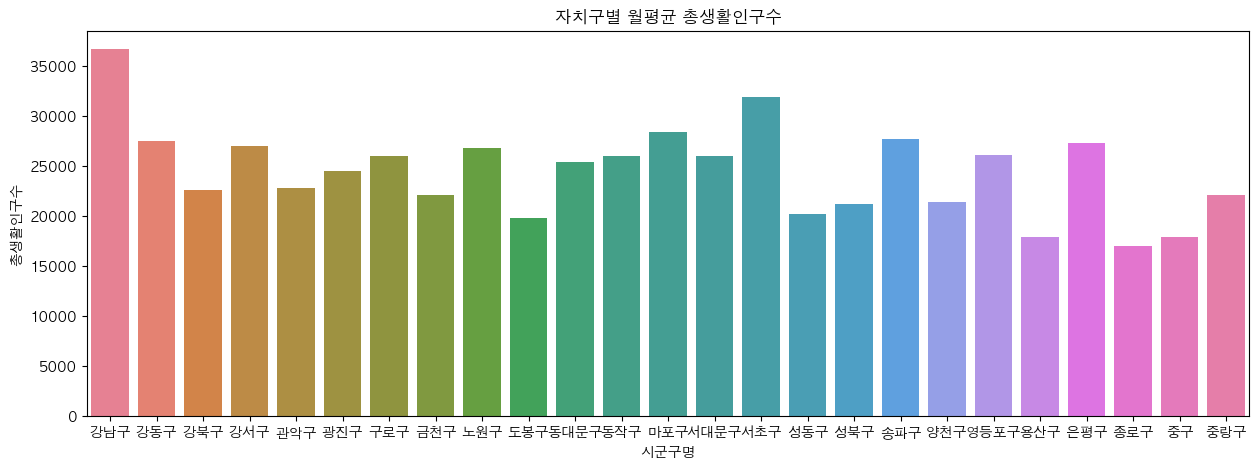

In [104]:
plt.figure(figsize=(15, 5))
plt.title('자치구별 월평균 총생활인구수')
sns.barplot(data=df, x='시군구명', y='총생활인구수', hue='시군구명')

## Q5. 총생활인구수가 가장 많은 자치구 top3?

In [91]:
df = pd.pivot_table(data=merged_population_df, index=['시도명', '시군구명'], values='총생활인구수', aggfunc='mean').sort_values(by='총생활인구수', ascending=False)[0:3]
df

총생활인구수
시도명 시군구명        
서울  강남구    36665
    서초구    31846
    마포구    28415

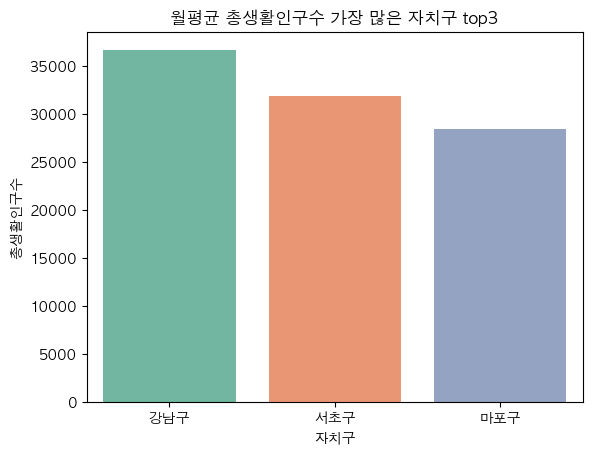

In [93]:
plt.title('월평균 총생활인구수 가장 많은 자치구 top3')
plt.xlabel('자치구')
sns.barplot(data=df, x='시군구명', y='총생활인구수', hue='시군구명', palette='Set2')
plt.show()

## Q6. 총생활인구수가 가장 적은 자치구 top3?

In [107]:
df = pd.pivot_table(data=merged_population_df, index=['시도명', '시군구명'], values='총생활인구수', aggfunc='mean').sort_values(by='총생활인구수')[0:3]
df

총생활인구수
시도명 시군구명        
서울  종로구    16939
    중구     17860
    용산구    17903

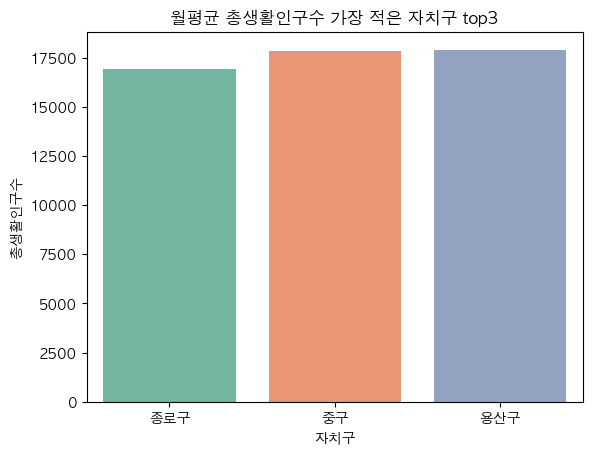

In [108]:
plt.title('월평균 총생활인구수 가장 적은 자치구 top3')
plt.xlabel('자치구')
sns.barplot(data=df, x='시군구명', y='총생활인구수', hue='시군구명', palette='Set2')
plt.show()

## Q7. 각 연령별로 가장 많은/적은 자치구와 행정동 top3는?

In [11]:
copy_merged_population_df = merged_population_df.copy()
columns = copy_merged_population_df.columns
for index in range(6, 20):
  copy_merged_population_df[columns[index]] += copy_merged_population_df[columns[index+14]]
copy_merged_population_df.drop(columns=['여자0세부터9세생활인구수', '여자10세부터14세생활인구수', '여자15세부터19세생활인구수',
       '여자20세부터24세생활인구수', '여자25세부터29세생활인구수', '여자30세부터34세생활인구수',
       '여자35세부터39세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수',
       '여자50세부터54세생활인구수', '여자55세부터59세생활인구수', '여자60세부터64세생활인구수',
       '여자65세부터69세생활인구수', '여자70세이상생활인구수'], inplace=True)
copy_merged_population_df.columns = ['기준일', '시도명', '시군구명', '행정동명', '행정동코드', '총생활인구수', '0 ~ 9세',
       '10 ~ 14세', '15 ~ 19세', '20 ~ 24세', '25 ~ 29세', '30 ~ 34세', '35 ~ 39세',
       '40 ~ 44세', '45 ~ 49세', '50 ~ 54세', '55 ~ 59세', '60 ~ 64세', '65 ~ 69세', '70세이상']
copy_merged_population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31800 entries, 0 to 31799
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준일       31800 non-null  object 
 1   시도명       31800 non-null  object 
 2   시군구명      31800 non-null  object 
 3   행정동명      31800 non-null  object 
 4   행정동코드     31800 non-null  int64  
 5   총생활인구수    31800 non-null  float64
 6   0 ~ 9세    31800 non-null  float64
 7   10 ~ 14세  31800 non-null  float64
 8   15 ~ 19세  31800 non-null  float64
 9   20 ~ 24세  31800 non-null  float64
 10  25 ~ 29세  31800 non-null  float64
 11  30 ~ 34세  31800 non-null  float64
 12  35 ~ 39세  31800 non-null  float64
 13  40 ~ 44세  31800 non-null  float64
 14  45 ~ 49세  31800 non-null  float64
 15  50 ~ 54세  31800 non-null  float64
 16  55 ~ 59세  31800 non-null  float64
 17  60 ~ 64세  31800 non-null  float64
 18  65 ~ 69세  31800 non-null  float64
 19  70세이상     31800 non-null  float64
dtypes: float64(15), int64(1), ob

### 연령 평균 

In [24]:
# 행정동별 생활인구 연령
pop_per_dong_df = pd.pivot_table(data=copy_merged_population_df, index=['시도명', '시군구명', '행정동명', '행정동코드'], values=copy_merged_population_df.columns[6:])
pop_per_dong_df

0 ~ 9세     10 ~ 14세     15 ~ 19세     20 ~ 24세  \
시도명 시군구명 행정동명 행정동코드                                                          
서울  강남구  개포1동 11680660   699.335716   447.401412   503.125497   374.617300   
         개포2동 11680670  1610.680604  1371.548362  1953.089678  1160.853103   
         개포4동 11680690  1098.511011   694.356345  1023.627857   849.288848   
         논현1동 11680521   987.932881   425.098138  1287.952737  3950.573063   
         논현2동 11680531  1802.716255   706.360752  1294.691277  3006.265653   
...                             ...          ...          ...          ...   
    중랑구  상봉2동 11260590  1089.457319   449.596411   822.385194  1946.535318   
         신내1동 11260680  3768.972682  1543.319233  1685.499874  1778.265483   
         신내2동 11260690  1374.728653   788.994333   987.166902   971.602657   
         중화1동 11260600  1597.559836   657.724755   799.705770   882.740898   
         중화2동 11260610  1577.058027   678.440542   970.321299  1580.274467   

                           25 ~ 29세     30 ~ 34세     35 ~ 39세     40 ~ 44세  \
시도명 시군구명 행정동명 행정동코드                                                          
서울  강남구  개포1동 11680660   416.838998   522.050438   712.884012   796.527479   
         개포2동 11680670  1032.196605  1152.155016  1559.127040  1858.031468   
         개포4동 11680690  1130.318949  1270.189946  1471.273378  1407.463874   
         논현1동 11680521  6427.098030  5983.719267  5712.611498  4273.402433   
         논현2동 11680531  5593.450365  5652.018955  5814.060279  4773.551571   
...                             ...          ...          ...          ...   
    중랑구  상봉2동 11260590  2685.218248  2460.125329  2364.790195  1812.123038   
         신내1동 11260680  1987.228846  1956.531996  2685.830753  2534.065145   
         신내2동 11260690  1068.285478  1114.028405  1416.885268  1261.016212   
         중화1동 11260600  1122.637735  1169.835104  1258.071506  1051.784786   
         중화2동 11260610  1814.034537  1745.144653  1986.606452  1728.171897   

                           45 ~ 49세     50 ~ 54세     55 ~ 59세     60 ~ 64세  \
시도명 시군구명 행정동명 행정동코드                                                          
서울  강남구  개포1동 11680660   878.206666   725.071829   757.266036   670.913648   
         개포2동 11680670  2303.851671  1772.790507  1762.530262  1523.383651   
         개포4동 11680690  1552.462064  1401.814545  1318.335364  1160.925750   
         논현1동 11680521  3758.859702  2583.226228  2277.618730  1844.608443   
         논현2동 11680531  4153.675298  2821.175967  2437.364384  1856.882070   
...                             ...          ...          ...          ...   
    중랑구  상봉2동 11260590  1973.283883  1952.553909  2213.057385  1772.294391   
         신내1동 11260680  2704.538548  2545.666091  2852.708870  2464.096025   
         신내2동 11260690  1404.640845  1341.560456  1573.907804  1379.322942   
         중화1동 11260600  1189.423965  1162.581704  1357.069778  1159.976285   
         중화2동 11260610  2037.693240  2161.546279  2577.644601  2115.515369   

                           65 ~ 69세        70세이상  
시도명 시군구명 행정동명 행정동코드                               
서울  강남구  개포1동 11680660   582.531687  1137.343736  
         개포2동 11680670  1287.622725  2638.687674  
         개포4동 11680690   890.091794  1554.852048  
         논현1동 11680521  1423.619553  2891.453059  
         논현2동 11680531  1430.658357  3158.528927  
...                             ...          ...  
    중랑구  상봉2동 11260590  1308.808261  2799.924086  
         신내1동 11260680  1647.583166  4014.130908  
         신내2동 11260690   966.682975  2615.375873  
         중화1동 11260600   902.134771  2112.772124  
         중화2동 11260610  1608.434248  3777.118319  

[424 rows x 14 columns]

In [25]:
# 자치구별 생활인구 연령
pop_per_gu_df = pd.pivot_table(data=copy_merged_population_df, index=['시도명', '시군구명'], values=copy_merged_population_df.columns[6:])
pop_per_gu_df

0 ~ 9세     10 ~ 14세     15 ~ 19세     20 ~ 24세     25 ~ 29세  \
시도명 시군구명                                                                    
서울  강남구   2100.943608  1375.302319  2235.533810  2374.253614  3432.367508   
    강동구   2206.406031  1216.114568  1490.538046  1451.894467  1728.165990   
    강북구   1457.024268   797.941897  1080.139239  1533.917996  1515.422405   
    강서구   2111.873815   958.789142  1248.777997  1525.873421  2206.499215   
    관악구   1155.319176   559.969990   982.730008  2198.235817  2960.778547   
    광진구   1543.298479   838.086636  1344.462852  2315.466815  2365.942413   
    구로구   1953.204363   860.741345  1102.031617  1473.143956  1994.349786   
    금천구   1166.114595   564.702465   733.471219  1302.587988  2134.568899   
    노원구   2030.798033  1337.535866  1980.144357  2032.417874  1597.468921   
    도봉구   1384.976457   777.677237  1003.485968  1166.333701  1202.707818   
    동대문구  1485.608396   737.439804  1288.847487  2620.482206  2149.268470   
    동작구   1764.791815   819.317535  1275.375798  2372.239982  2542.532623   
    마포구   1669.276350   834.334047  1430.345543  2697.977195  3014.254253   
    서대문구  1563.467615   809.692148  1384.901779  2661.693157  2351.775259   
    서초구   2157.897652  1182.147305  1656.186693  1992.496636  2591.865716   
    성동구   1319.538060   572.660253   881.991724  1610.288307  1811.533329   
    성북구   1596.546162   889.528478  1331.150451  1980.714168  1561.265020   
    송파구   2226.050229  1155.669379  1449.141927  1579.674849  2061.231525   
    양천구   1827.695001  1279.080452  1522.509345  1144.366669  1245.248209   
    영등포구  1485.422115   643.175459   906.229985  1564.956878  2481.786172   
    용산구    903.884717   446.813612   727.985608  1307.237521  1655.166594   
    은평구   2041.354878  1126.617386  1494.336097  1580.739342  1800.671990   
    종로구    632.421986   372.907887   795.059917  1505.723434  1540.101250   
    중구     586.658554   241.408623   524.516629  1297.049593  1745.232530   
    중랑구   1575.770101   760.141652   976.161279  1307.794621  1543.741394   

             30 ~ 34세     35 ~ 39세     40 ~ 44세     45 ~ 49세     50 ~ 54세  \
시도명 시군구명                                                                    
서울  강남구   3433.420278  3772.768516  3444.128346  3524.429922  2530.121283   
    강동구   1837.677343  2321.726262  2191.652914  2301.945954  1967.334781   
    강북구   1313.958106  1575.577325  1551.555491  1841.860988  1700.549768   
    강서구   2327.917588  2578.096751  2200.727491  2192.474192  1780.103801   
    관악구   2229.348794  1939.310027  1575.009850  1630.780119  1377.973667   
    광진구   1987.168330  2042.848056  1779.654321  1929.980704  1705.031073   
    구로구   2097.649646  2412.086623  2148.404671  2245.898477  1865.735609   
    금천구   2072.333835  2175.078784  1826.811844  1938.726755  1710.807903   
    노원구   1465.359900  1793.327999  1848.032567  2268.685192  1988.878160   
    도봉구   1148.473074  1396.933016  1325.047795  1581.129527  1490.738682   
    동대문구  1704.441051  1967.286398  1773.111947  1918.041526  1715.490052   
    동작구   2055.316163  2115.286455  1838.693807  1942.436743  1671.291092   
    마포구   2660.281326  2834.523930  2381.599026  2422.134771  1825.638110   
    서대문구  1928.336594  2136.562629  1928.017011  2107.202576  1789.855665   
    서초구   2646.592842  3069.678692  2912.779956  3091.905870  2336.079341   
    성동구   1696.744458  1941.111240  1615.695400  1659.469273  1405.846407   
    성북구   1294.096605  1553.586668  1481.039812  1700.966437  1476.178220   
    송파구   2196.822758  2587.294907  2296.944057  2347.155802  1952.391335   
    양천구   1259.861784  1604.494647  1695.043739  1964.965356  1601.590881   
    영등포구  2571.913919  2753.048032  2283.722331  2308.743159  1916.276901   
    용산구   1704.414644  1893.814557  1568.759340  1596.292148  1277.284394   
    은평구   1799.072220  2199.128856  2059.840015  2280.533291  1966.050699   
    종로구   1349.199161  1474.705924  1340.904384  1543.333913  1331.501248   
    중구    

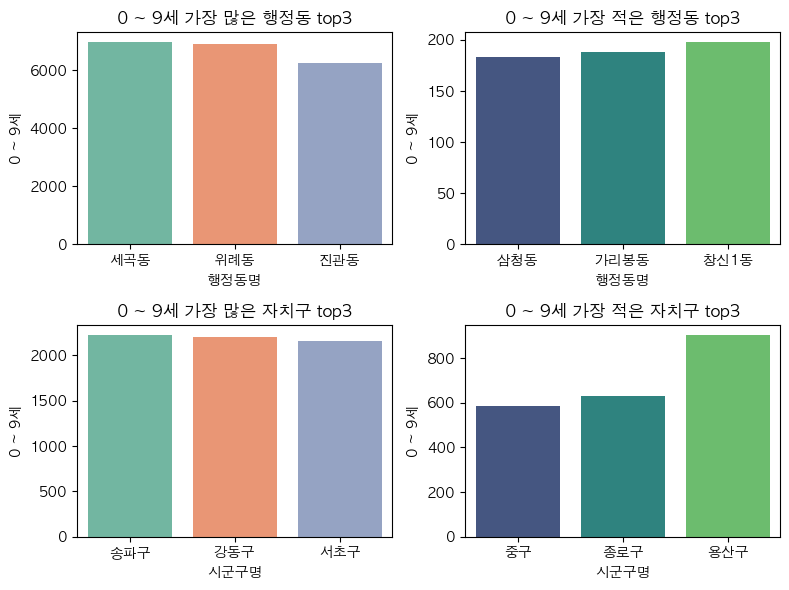

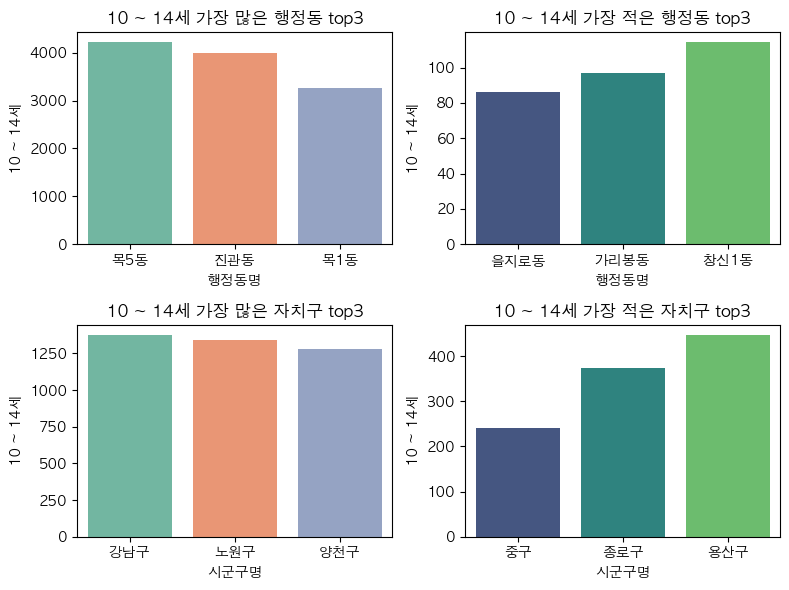

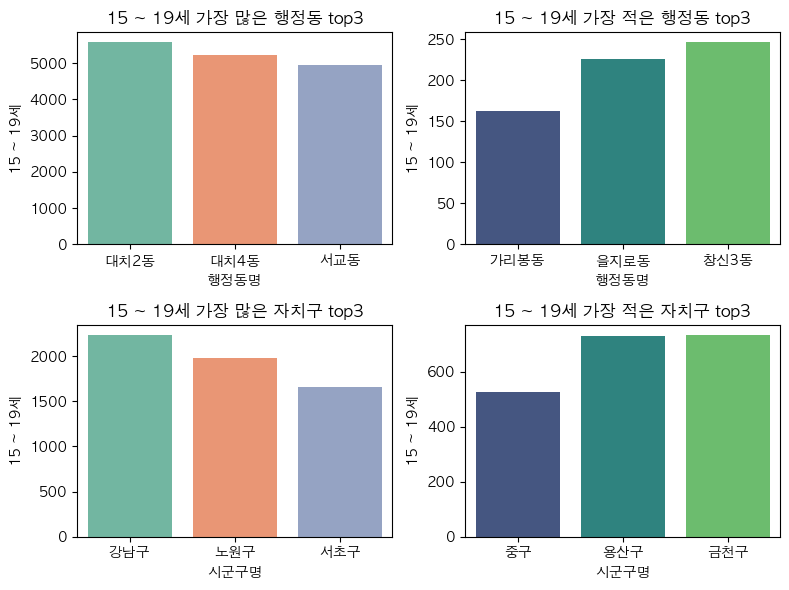

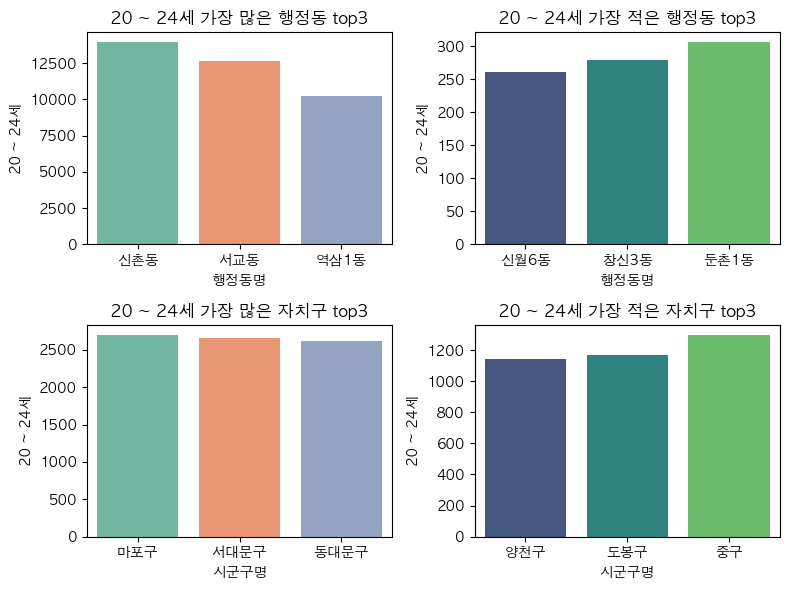

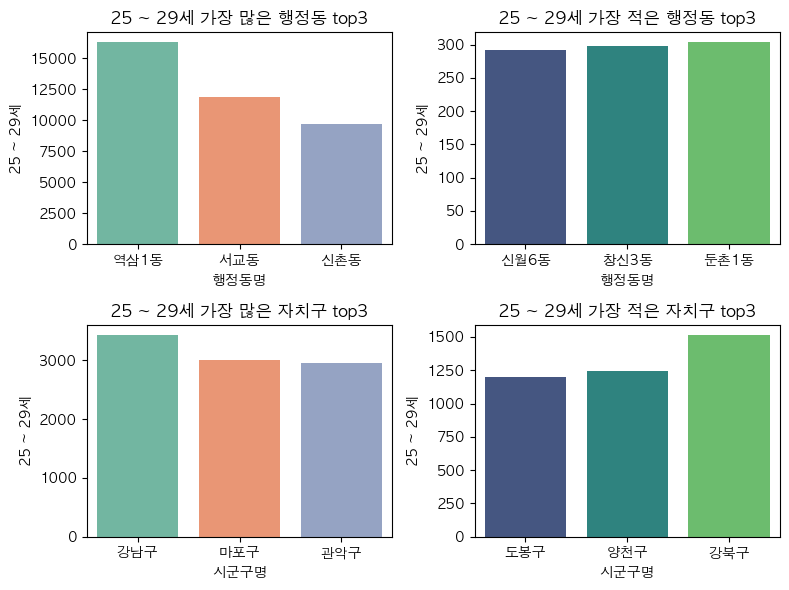

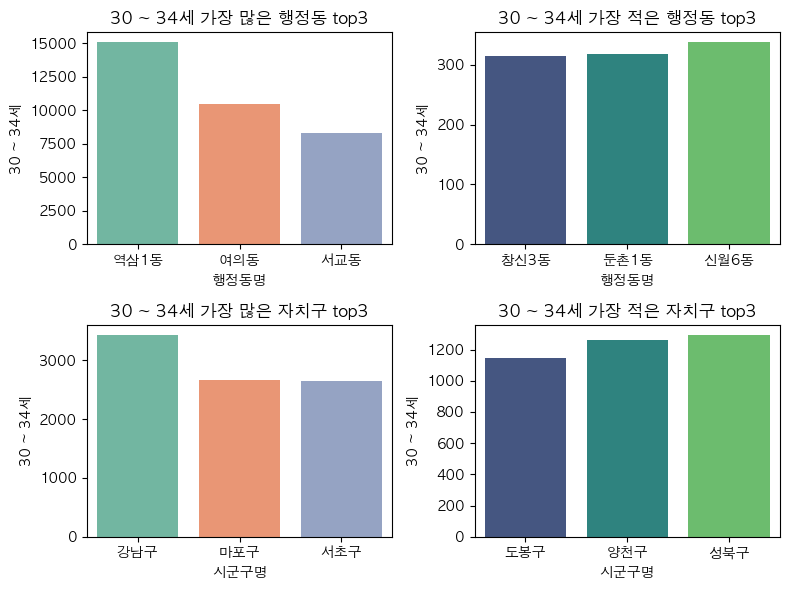

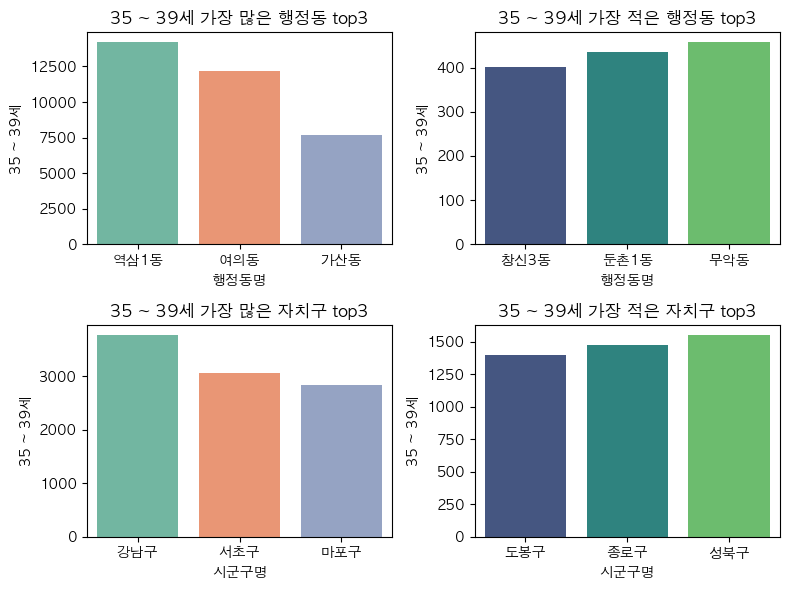

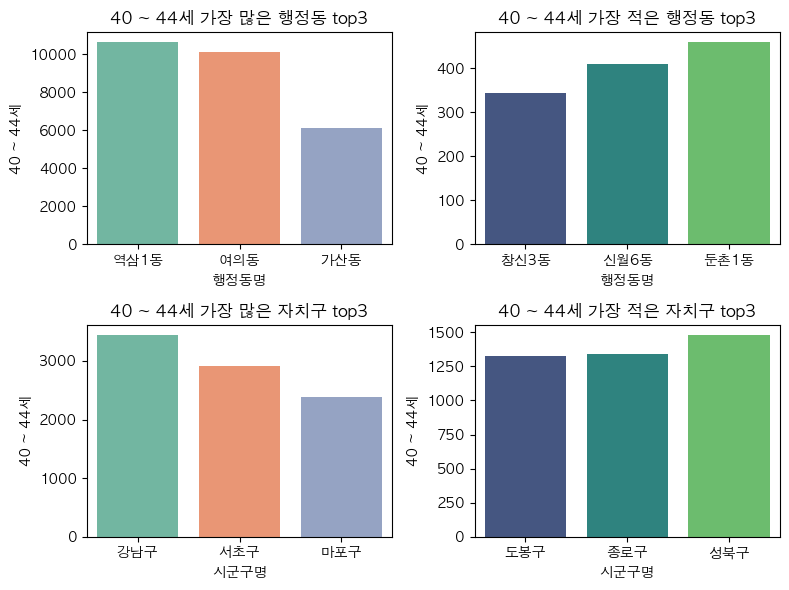

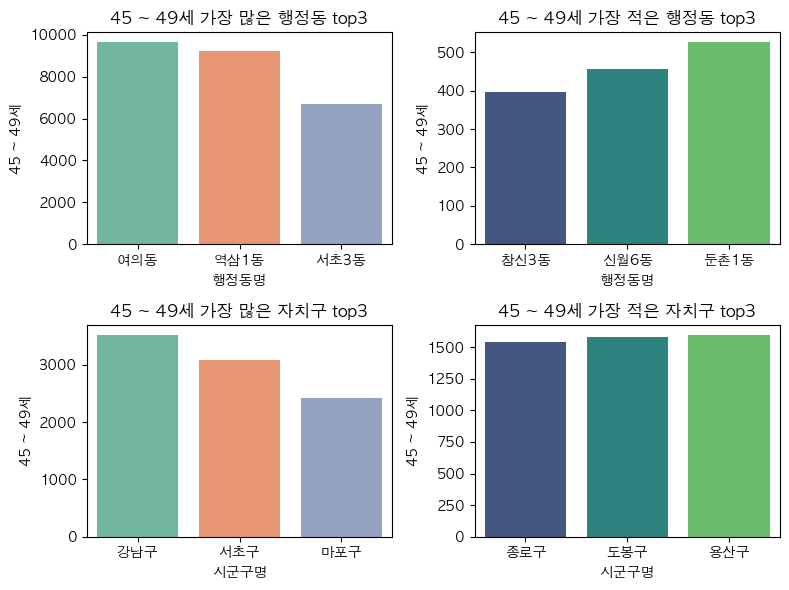

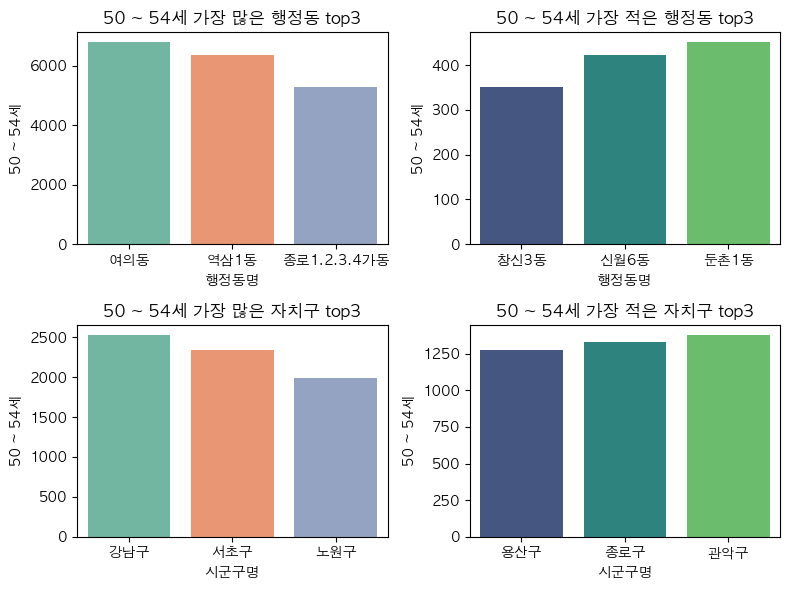

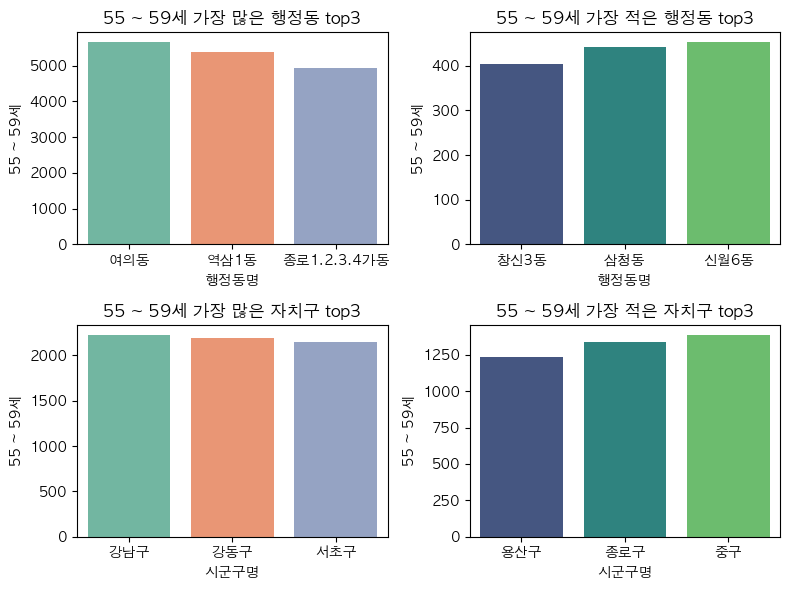

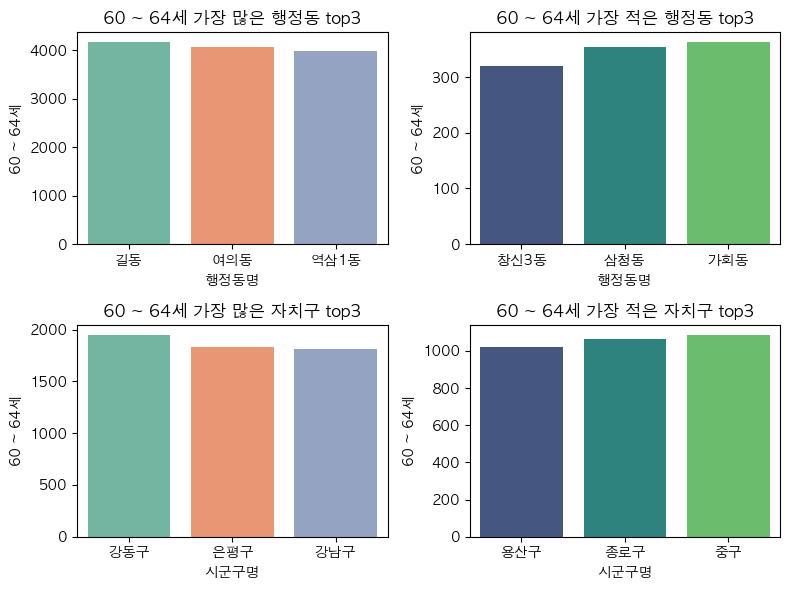

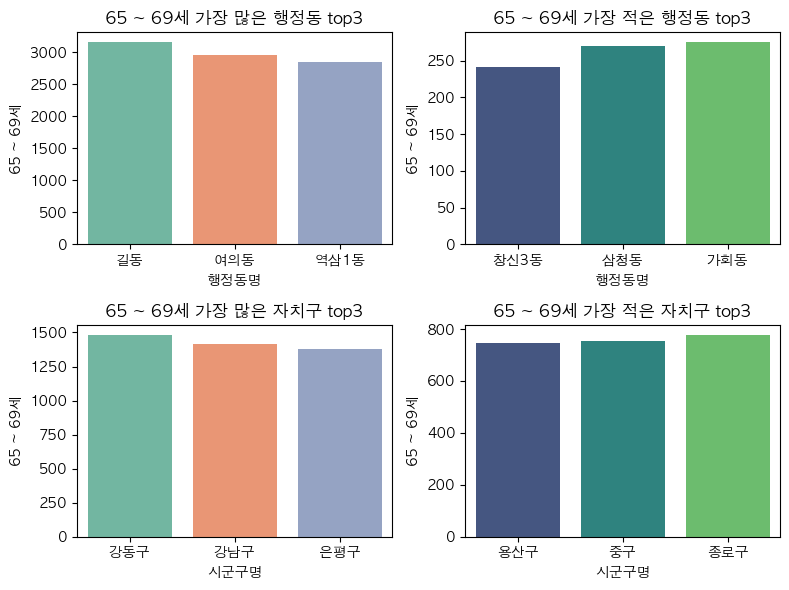

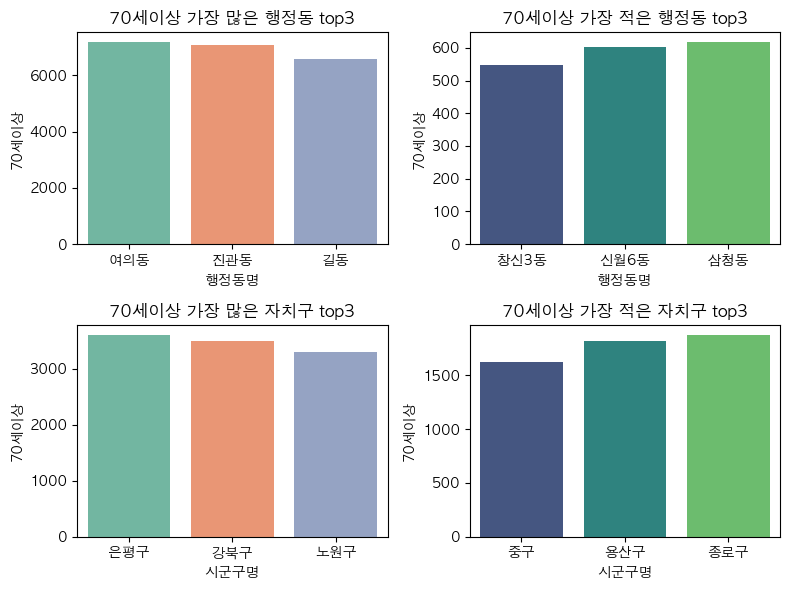

In [67]:
col_list = copy_merged_population_df.columns[6:]
for col_name in col_list:
  
  # N ~ N세 생활인구수가 가장 많은 행정동 top3
  top_dong_df = pop_per_dong_df.sort_values(by=col_name, ascending=False).loc[:, [col_name]][0:3]
  # N ~ N세 생활인구수가 가장 적은 행정동 top3
  bottom_dong_df = pop_per_dong_df.sort_values(by=col_name).loc[:, [col_name]][0:3]
  # N ~ N세 생활인구수가 가장 많은 자치구 top3
  top_gu_df = pop_per_gu_df.sort_values(by=col_name, ascending=False).loc[:, [col_name]][0:3]
  # N ~ N세 생활인구수가 가장 적은 자치구 top3
  bottom_gu_df = pop_per_gu_df.sort_values(by=col_name).loc[:, [col_name]][0:3]

  plt.figure(figsize=(8, 6))
  
  plt.subplot(2, 2, 1)
  plt.title(f"{col_name} 가장 많은 행정동 top3", loc='center')
  sns.barplot(data=top_dong_df, x='행정동명', y=col_name, hue='행정동명', palette='Set2')
  
  plt.subplot(2, 2, 2)
  plt.title(f"{col_name} 가장 적은 행정동 top3", loc='center')
  sns.barplot(data=bottom_dong_df, x='행정동명', y=col_name, hue='행정동명', palette='viridis')
  
  plt.subplot(2, 2, 3)
  plt.title(f"{col_name} 가장 많은 자치구 top3", loc='center')
  sns.barplot(data=top_gu_df, x='시군구명', y=col_name, hue='시군구명', palette='Set2')
  
  plt.subplot(2, 2, 4)
  plt.title(f"{col_name} 가장 적은 자치구 top3", loc='center')
  sns.barplot(data=bottom_gu_df, x='시군구명', y=col_name, hue='시군구명', palette='viridis')
  
  plt.tight_layout()
  plt.show()

### 전체생활인구에 대한 연령 비율

In [82]:
index_df = copy_merged_population_df.loc[:, copy_merged_population_df.columns[0:5]]
value_df = copy_merged_population_df.loc[:, copy_merged_population_df.columns[6:]]
for column in value_df.columns:
  value_df[column] /= copy_merged_population_df['총생활인구수']
data = pd.concat([index_df, value_df], axis=1)

# 행정동별 생활인구 연령
pop_per_dong_df = pd.pivot_table(data=data, index=['시도명', '시군구명', '행정동명', '행정동코드'], values=copy_merged_population_df.columns[6:])
# 자치구별 생활인구 연령
pop_per_gu_df = pd.pivot_table(data=data, index=['시도명', '시군구명'], values=copy_merged_population_df.columns[6:])

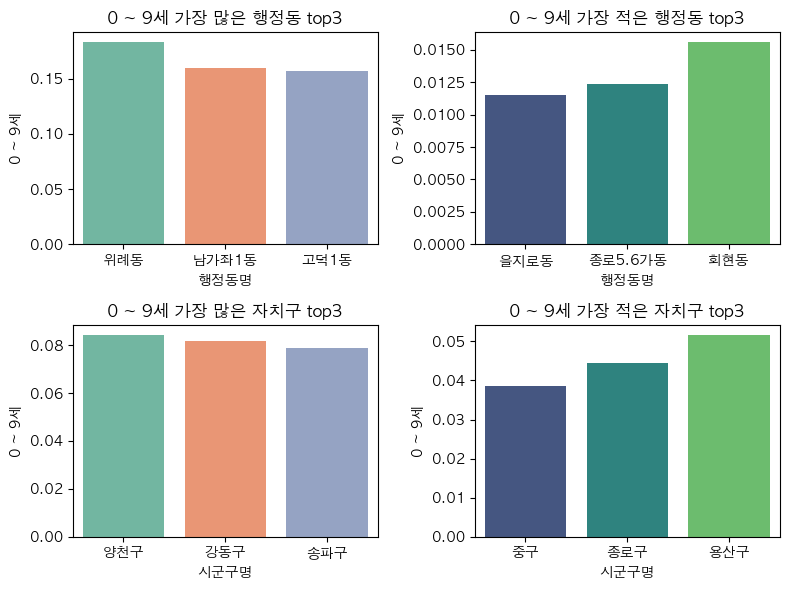

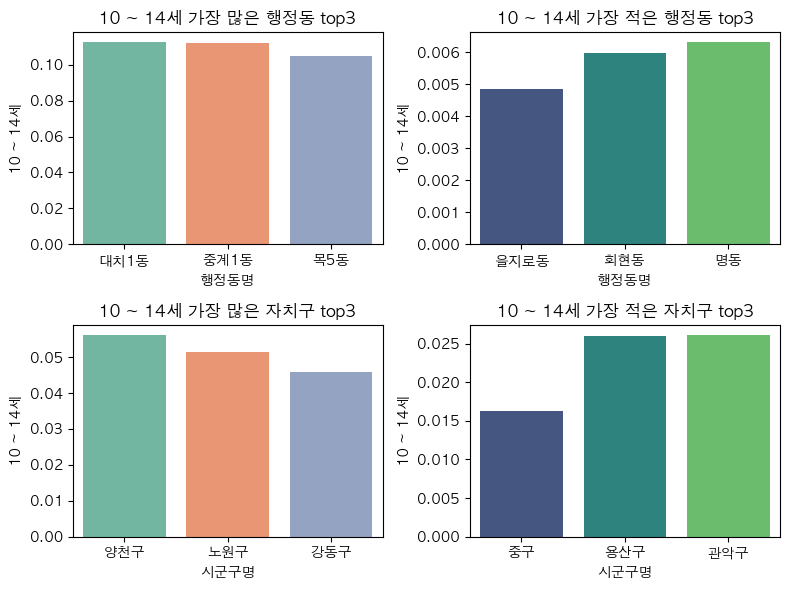

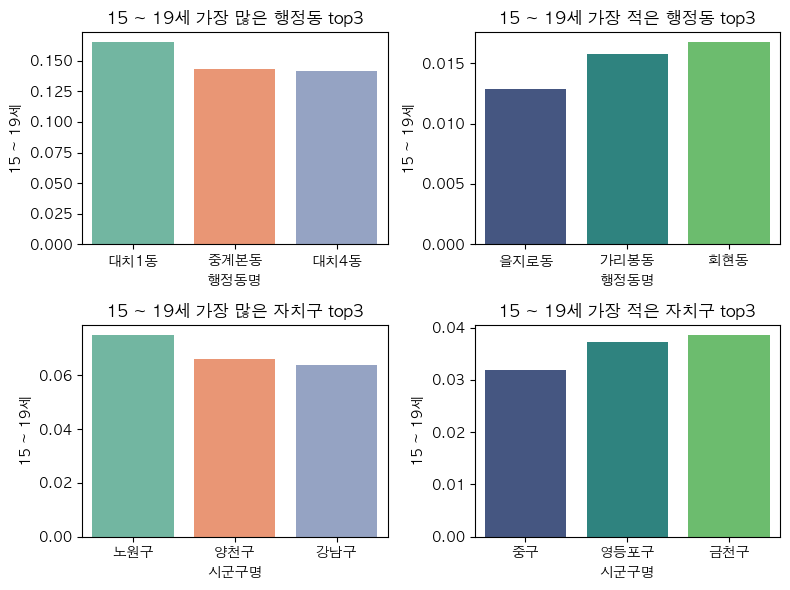

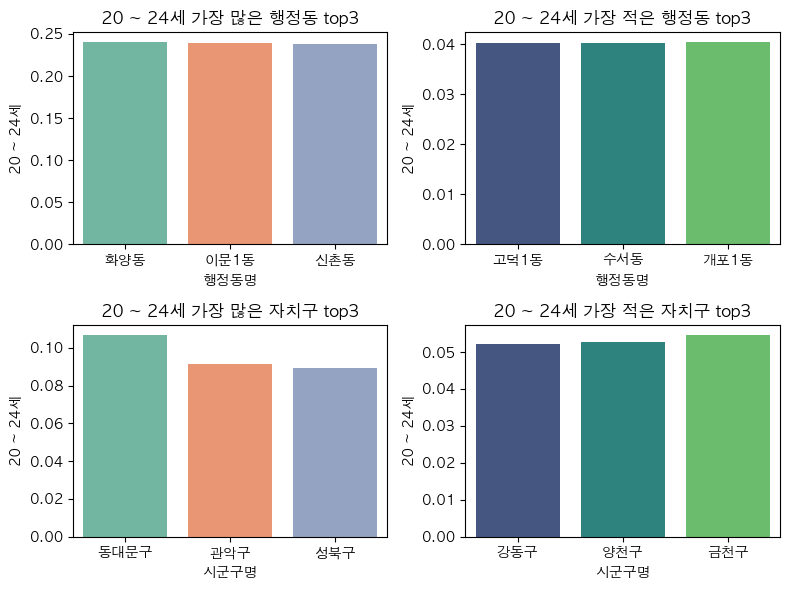

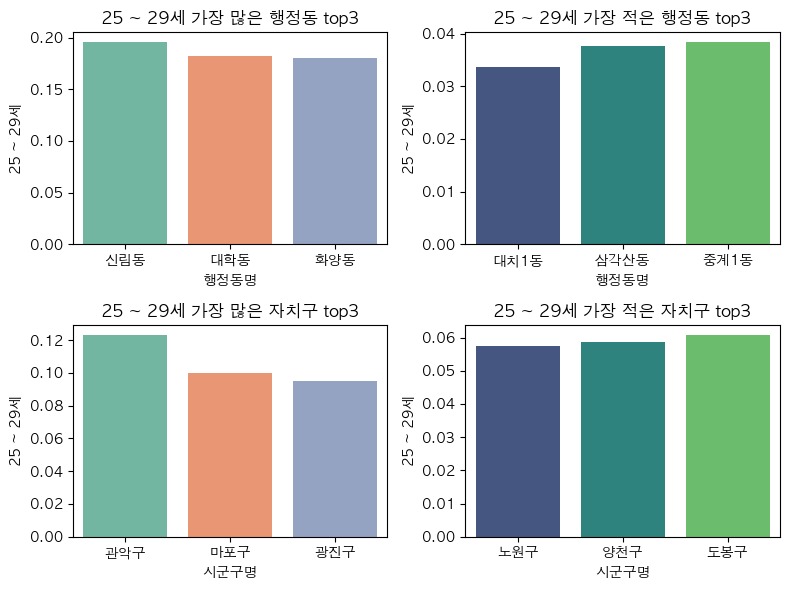

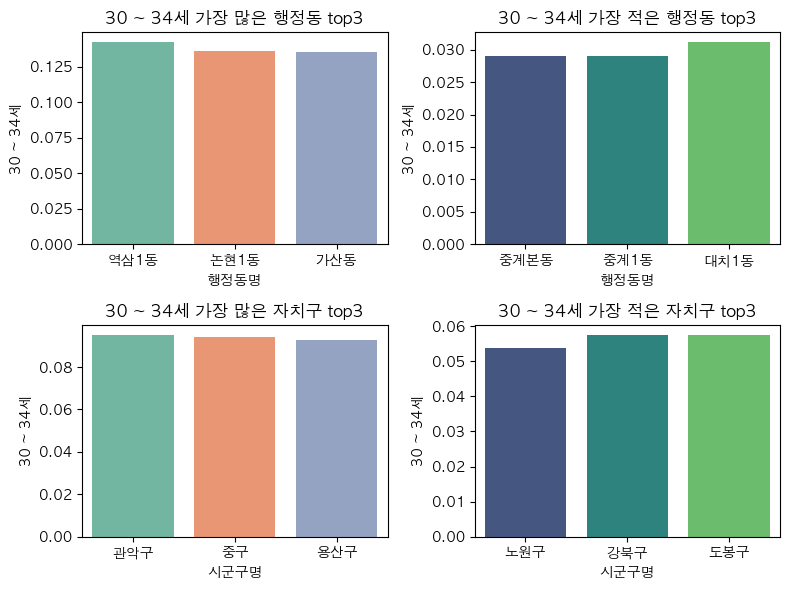

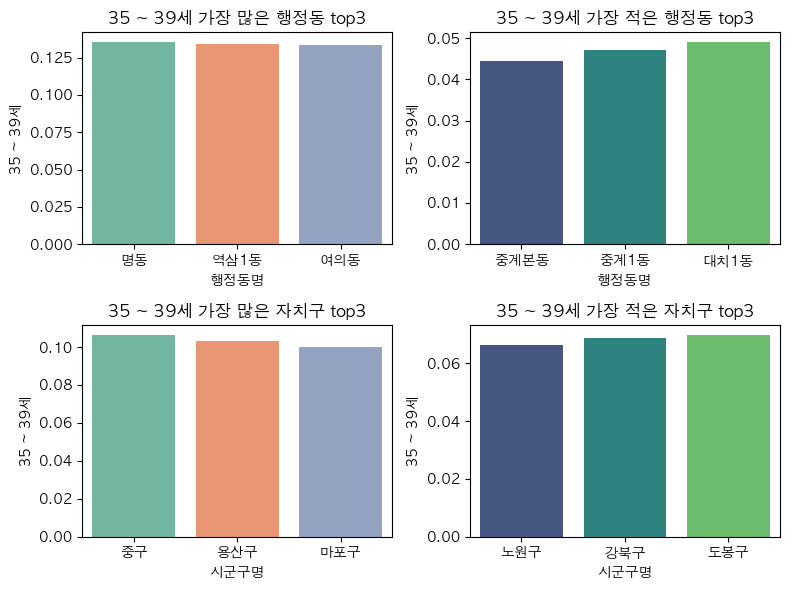

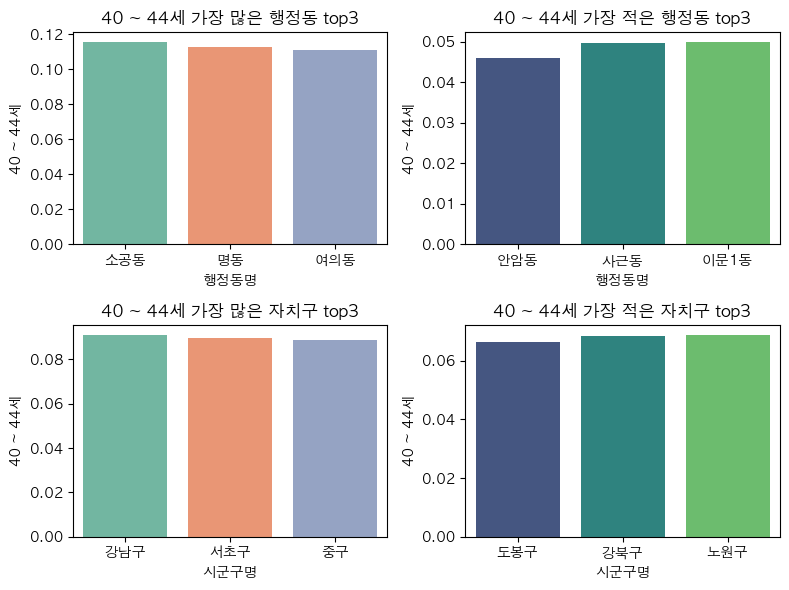

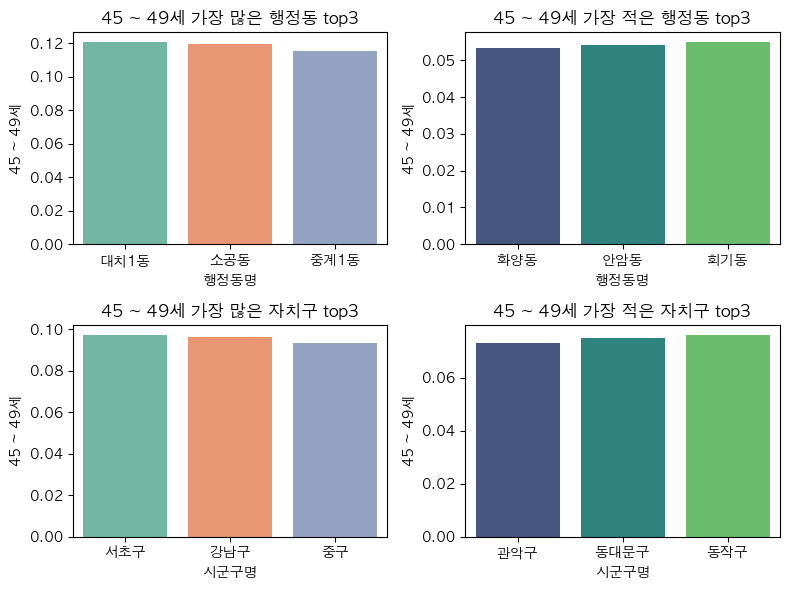

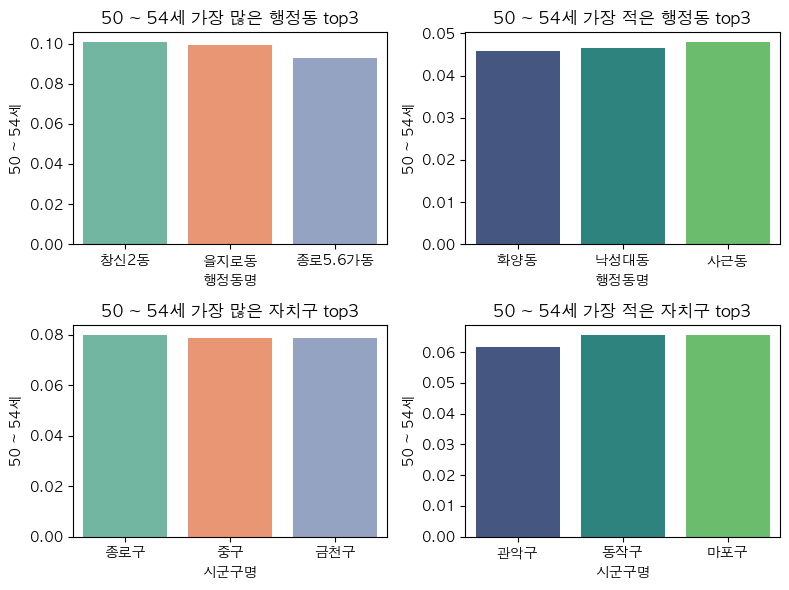

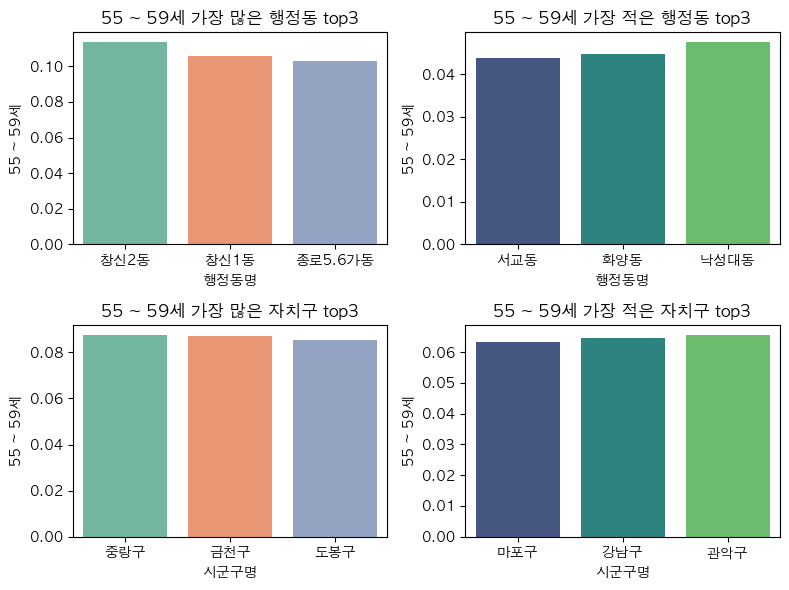

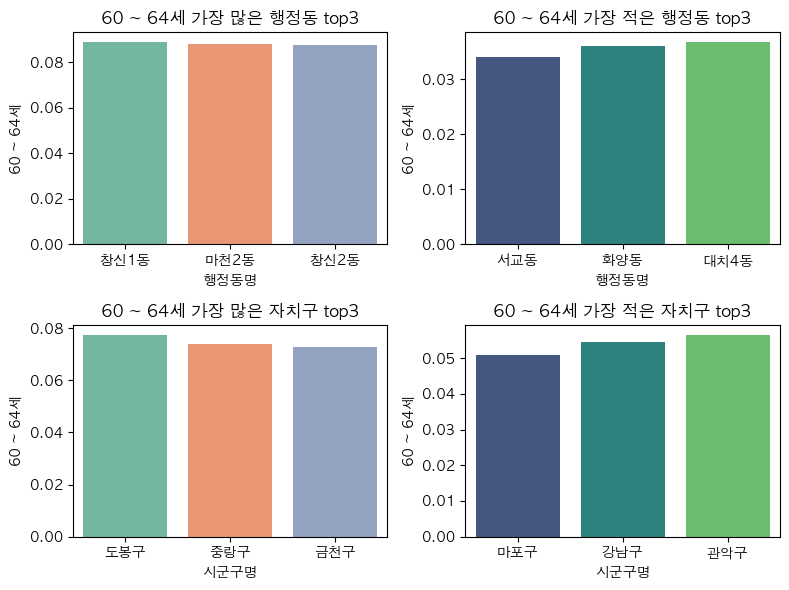

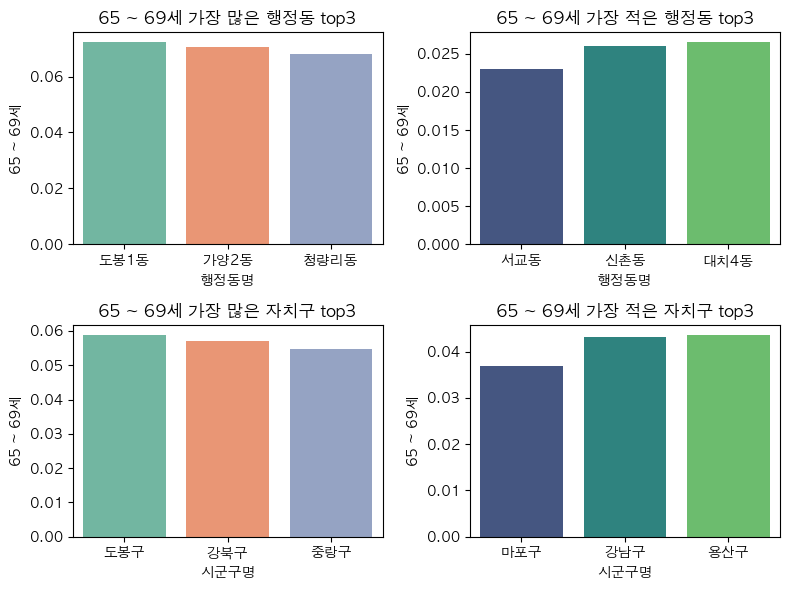

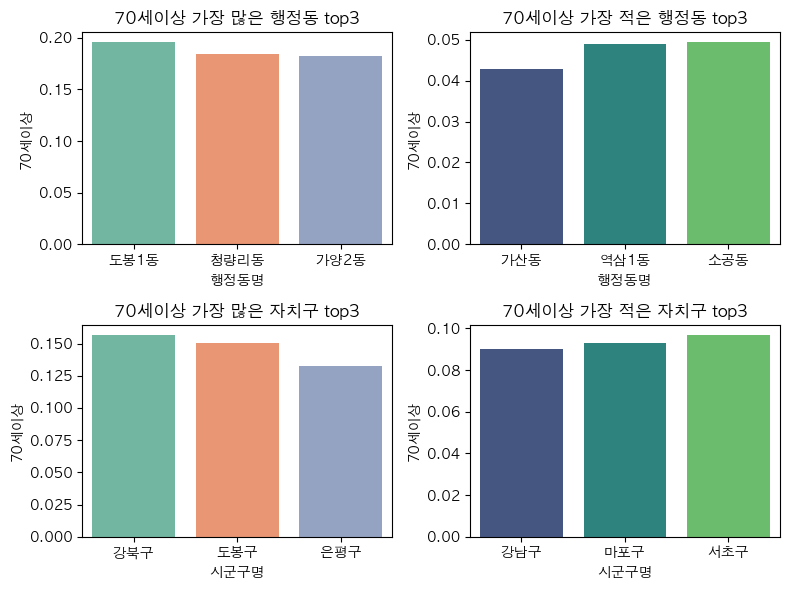

In [85]:
col_list = copy_merged_population_df.columns[6:]
for col_name in col_list:
  
  # N ~ N세 생활인구수가 가장 많은 행정동 top3
  top_dong_df = pop_per_dong_df.sort_values(by=col_name, ascending=False).loc[:, [col_name]][0:3]
  # N ~ N세 생활인구수가 가장 적은 행정동 top3
  bottom_dong_df = pop_per_dong_df.sort_values(by=col_name).loc[:, [col_name]][0:3]
  # N ~ N세 생활인구수가 가장 많은 자치구 top3
  top_gu_df = pop_per_gu_df.sort_values(by=col_name, ascending=False).loc[:, [col_name]][0:3]
  # N ~ N세 생활인구수가 가장 적은 자치구 top3
  bottom_gu_df = pop_per_gu_df.sort_values(by=col_name).loc[:, [col_name]][0:3]

  plt.figure(figsize=(8, 6))
  
  plt.subplot(2, 2, 1)
  plt.title(f"{col_name} 가장 많은 행정동 top3", loc='center')
  sns.barplot(data=top_dong_df, x='행정동명', y=col_name, hue='행정동명', palette='Set2')
  
  plt.subplot(2, 2, 2)
  plt.title(f"{col_name} 가장 적은 행정동 top3", loc='center')
  sns.barplot(data=bottom_dong_df, x='행정동명', y=col_name, hue='행정동명', palette='viridis')
  
  plt.subplot(2, 2, 3)
  plt.title(f"{col_name} 가장 많은 자치구 top3", loc='center')
  sns.barplot(data=top_gu_df, x='시군구명', y=col_name, hue='시군구명', palette='Set2')
  
  plt.subplot(2, 2, 4)
  plt.title(f"{col_name} 가장 적은 자치구 top3", loc='center')
  sns.barplot(data=bottom_gu_df, x='시군구명', y=col_name, hue='시군구명', palette='viridis')
  
  plt.tight_layout()
  plt.show()